####
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Analyzing Top Reviews with the Most Thumbs Up
</h4>


##### Description:
This code uses Pandas and Plotly to analyze the dataset of app reviews. It sorts the data based on the number of thumbs up given by users and selects the top 20 reviews with the highest thumbs up count. The result is presented in an interactive bar plot, where each bar represents a review and its corresponding thumbs up count. The hover text displays the full review, app name, thumbs up count, and score for each review. The dark background and custom font size create an aesthetically pleasing visualization.

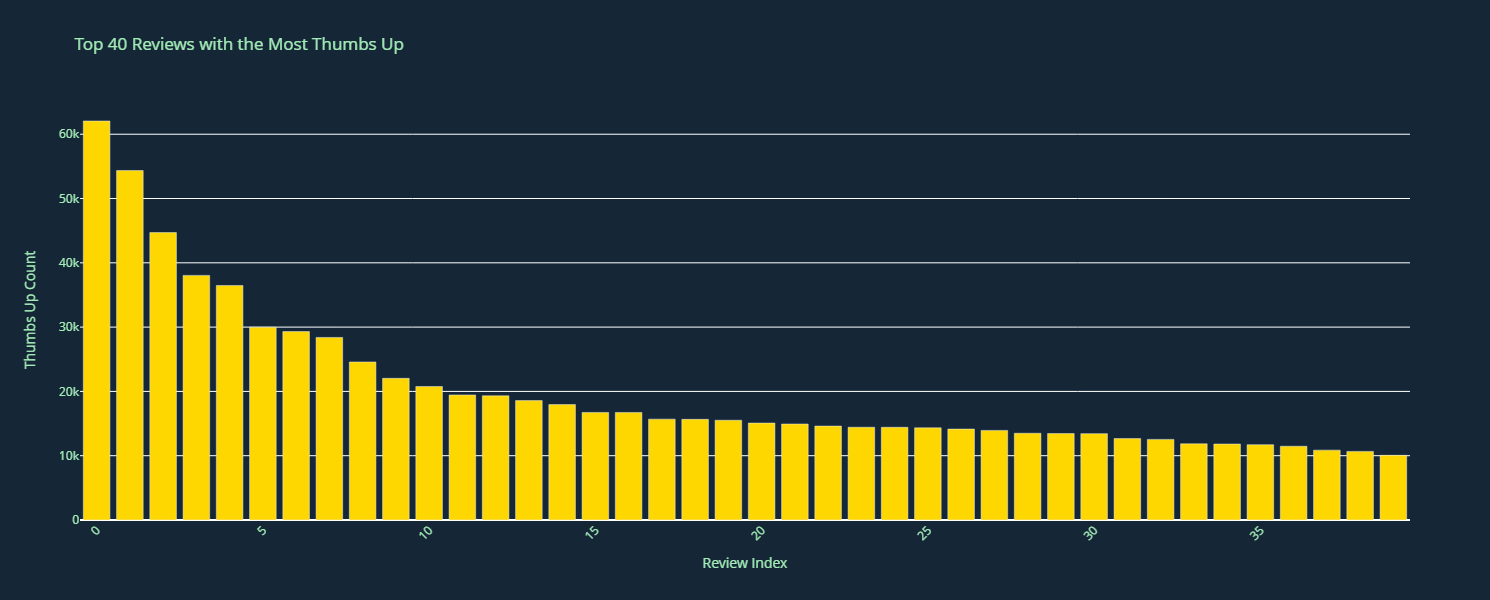

In [62]:
import pandas as pd
import plotly.graph_objects as go
import textwrap

# Sorting the data in descending order based on thumbs up count
df_reviews_sorted = df_reviews.sort_values(by='thumbs_up_count', ascending=False)

# Selecting the top 10 reviews with the most thumbs up
top_10_reviews = df_reviews.sort_values(by='thumbs_up_count', ascending=False).head(40).reset_index(drop = True)

# Create the interactive bar plot
fig = go.Figure()

# Function to wrap the review text every 20 words
def wrap_text(text):
    return '<br>'.join(textwrap.wrap(text, width=80))

# Function to format the hover text with HTML to make text bigger
def format_hover_text(review, app_name, thumbs_up_count, score, date):
    review_text = f"<b><span style='font-size: 14px;'>Review:</span></b><br>{wrap_text(review)}"
    app_text = f"<b><span style='font-size: 14px;'>App:</span></b> {app_name}"
    thumbs_up_text = f"<b><span style='font-size: 14px;'>Thumbs Up Count:</span></b> {thumbs_up_count}"
    score= f"<b><span style='font-size: 14px;'>Score:</span></b> {score}"
    date= f"<b><span style='font-size: 14px;'>Date:</span></b> {date}"
    return f"{app_text}<br>{thumbs_up_text}<br>{score}<br>{review_text}<br>{date}"

fig.add_trace(go.Bar(
    x=top_10_reviews.index,
    y=top_10_reviews['thumbs_up_count'],
    hovertext=top_10_reviews.apply(lambda row: format_hover_text(row['review'], row['app_name'], row['thumbs_up_count'], row['score'], row['date']), axis=1),
    hoverinfo='text',
    marker_color='#FFD700'  # Gold color for the bars
))

fig.update_layout(
    title='Top 40 Reviews with the Most Thumbs Up',
    xaxis_title='Review Index',
    yaxis_title='Thumbs Up Count',
    xaxis_tickangle=-45,
    showlegend=False,
    plot_bgcolor='#152737',  # Dark background
    paper_bgcolor='#152737',  # Dark background
    font=dict(color='#a4edb8'),  # Light text color
    height=600,
)

fig.show()

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Interactive Dashboard for Top Reviews with the Most Thumbs Up for each App
</h4>


##### Description:
This code uses Pandas, Plotly, and Dash to create an interactive dashboard for analyzing app reviews. The dashboard allows users to select an app name from a dropdown menu, and based on the selection, the top 40 reviews with the highest thumbs up count for that app are displayed in a bar plot. The hover text for each bar shows the full review, app name, thumbs up count, and score. The dashboard has a dark background, and the font size is customized to create an appealing visual experience. Users can explore the most popular reviews for each app in an interactive and user-friendly manner.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import textwrap
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Create Dash app
app = dash.Dash(__name__)

# Sorting the data in descending order based on thumbs up count
df_reviews_sorted = df_reviews.sort_values(by='thumbs_up_count', ascending=False)

# Create the dropdown options for app names
app_names = df_reviews['app_name'].unique()

# Create the layout for the app
app.layout = html.Div([
    html.H1("Top 20 Reviews with the Most Thumbs Up"),
    dcc.Dropdown(
        id='app-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in app_names],
        value=app_names[0]
    ),
    dcc.Graph(id='thumbs-up-bar-plot')
])

# Define callback to update the bar plot based on the selected app name
@app.callback(
    Output('thumbs-up-bar-plot', 'figure'),
    [Input('app-dropdown', 'value')]
)
def update_bar_plot(selected_app):
    # Filter the data for the selected app
    filtered_reviews = df_reviews[df_reviews['app_name'] == selected_app].sort_values(by='thumbs_up_count', ascending=False).head(40).reset_index(drop = True)

    # Create the interactive bar plot
    fig = go.Figure()

    # Function to wrap the review text every 20 words
    def wrap_text(text):
        return '<br>'.join(textwrap.wrap(text, width=80))

    # Function to format the hover text with HTML to make text bigger
    def format_hover_text(review, app_name, thumbs_up_count, score,date):
        review_text = f"<b><span style='font-size: 14px;'>Review:</span></b><br>{wrap_text(review)}"
        app_text = f"<b><span style='font-size: 14px;'>App:</span></b> {app_name}"
        thumbs_up_text = f"<b><span style='font-size: 14px;'>Thumbs Up Count:</span></b> {thumbs_up_count}"
        score_text = f"<b><span style='font-size: 14px;'>Score:</span></b> {score}"
        date= f"<b><span style='font-size: 14px;'>Date:</span></b> {date}"
        return f"{app_text}<br>{thumbs_up_text}<br>{score_text}<br>{review_text}<br>{date}"

    fig.add_trace(go.Bar(
        x=filtered_reviews.index,
        y=filtered_reviews['thumbs_up_count'],
        hovertext=filtered_reviews.apply(lambda row: format_hover_text(row['review'], row['app_name'], row['thumbs_up_count'], row['score'], row['date']), axis=1),
        hoverinfo='text',
        marker_color='#FFD700'  # Gold color for the bars
    ))

    fig.update_layout(
        title=f'Top 40 Reviews with the Most Thumbs Up for {selected_app}',
        xaxis_title='Review Index',
        yaxis_title='Thumbs Up Count',
        xaxis_tickangle=-45,
        showlegend=False,
        plot_bgcolor='#152737',  # Dark background
        paper_bgcolor='#152737',  # Dark background
        font=dict(color='#a4edb8'),  # Light text color
        height=500,
    )

    return fig


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

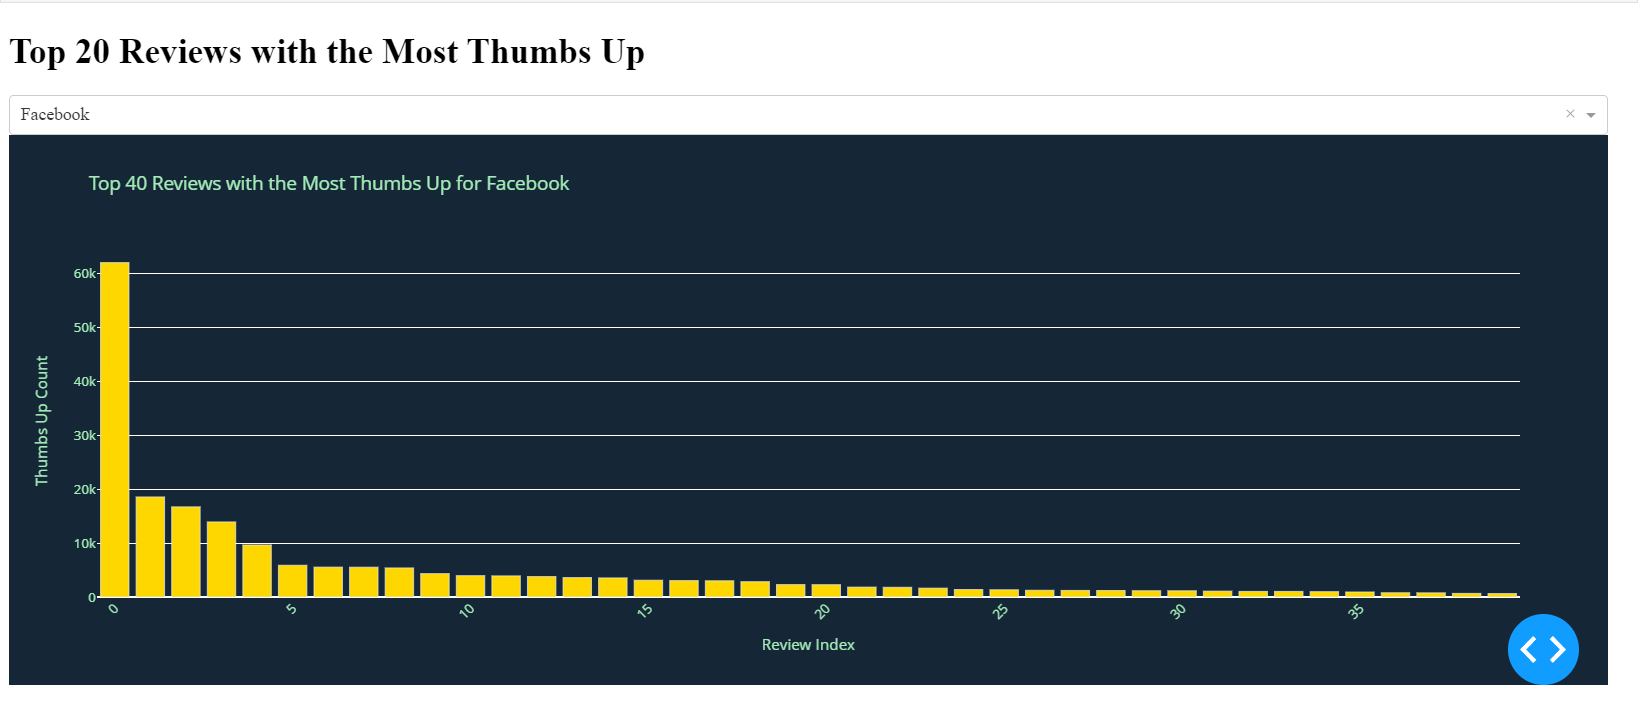
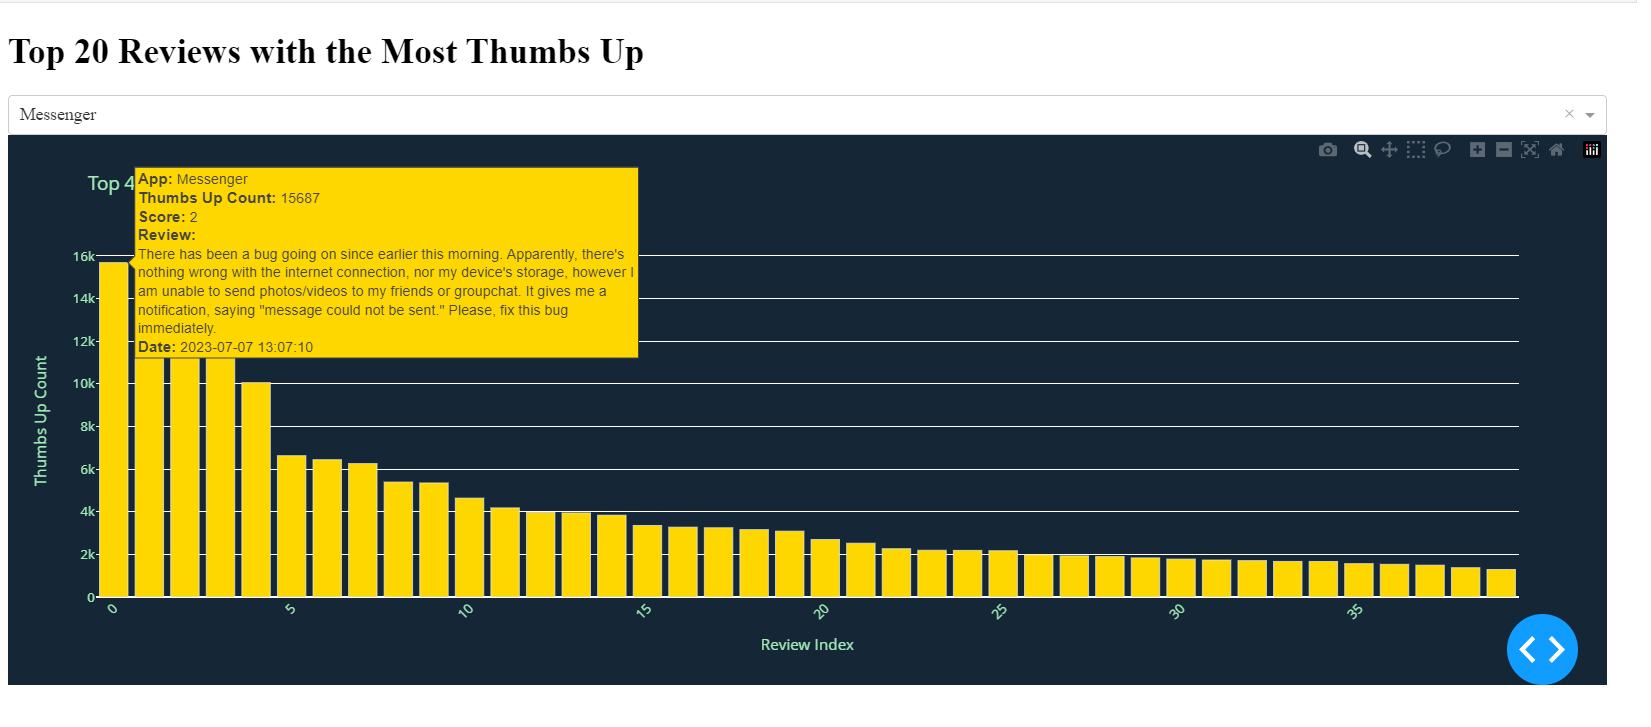
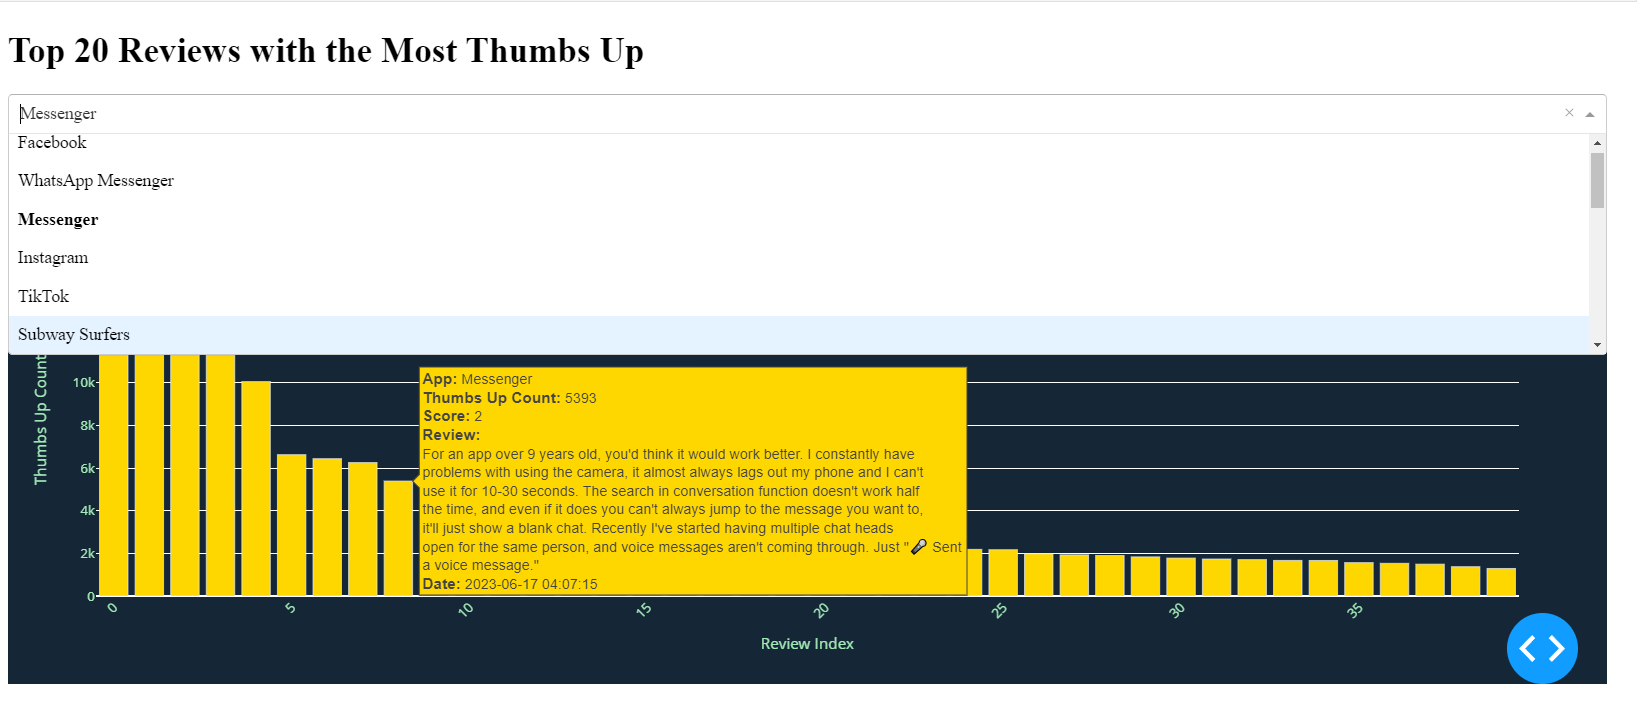

####

<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Top Reviewers for Each App - Dash Data Visualization
</h4>

Description: This interactive Dash app presents the top 10 reviewers for each app in the dataset. Users can select an app from the dropdown menu, and the app will display a bar plot showing the user names of the most prolific reviewers for that specific app. The plot is designed with a dark background and presents the reviewer names on the x-axis and the number of reviews they have submitted on the y-axis. Horizontal grid lines have been removed to provide a clean and focused visualization. This app allows for easy exploration of the most active users for each app and provides valuable insights into the user engagement within different applications.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Create Dash app
app = dash.Dash(__name__)

# Sorting the data in descending order based on the number of reviews per user
user_reviews_count = df_reviews['user_name'].value_counts()

# Create the dropdown options for app names
app_names = df_reviews['app_name'].unique()

# Create the layout for the app
app.layout = html.Div([
    html.H1("Top Reviewers for Each App"),
    dcc.Dropdown(
        id='app-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in app_names],
        value=app_names[0]
    ),
    dcc.Graph(id='top-reviewers-bar-plot')
])

# Define callback to update the bar plot based on the selected app name
@app.callback(
    Output('top-reviewers-bar-plot', 'figure'),
    [Input('app-dropdown', 'value')]
)
def update_bar_plot(selected_app):
    # Filter the data for the selected app
    filtered_reviews = df_reviews[df_reviews['app_name'] == selected_app]

    # Count the occurrences of each unique user_name for the selected app
    user_review_counts = filtered_reviews['user_name'].value_counts().head(10)

    # Create the interactive bar plot
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=user_review_counts.index,
        y=user_review_counts.values,
        marker_color='#FFD700'  # Gold color for the bars
    ))

    fig.update_layout(
        title=f'Top 10 Reviewers for {selected_app}',
        xaxis_title='User Names',
        yaxis_title='Number of Reviews',
        xaxis_tickangle=-45,
        showlegend=False,
        plot_bgcolor='#152737',  # Dark background
        paper_bgcolor='#152737',  # Dark background
        font=dict(color='#a4edb8'),  # Light text color
        height=500,
        #yaxis_type='log',  # Set y-axis to logarithmic scale
        yaxis=dict(showgrid=False)  # Remove horizontal grid lines

    )

    return fig


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

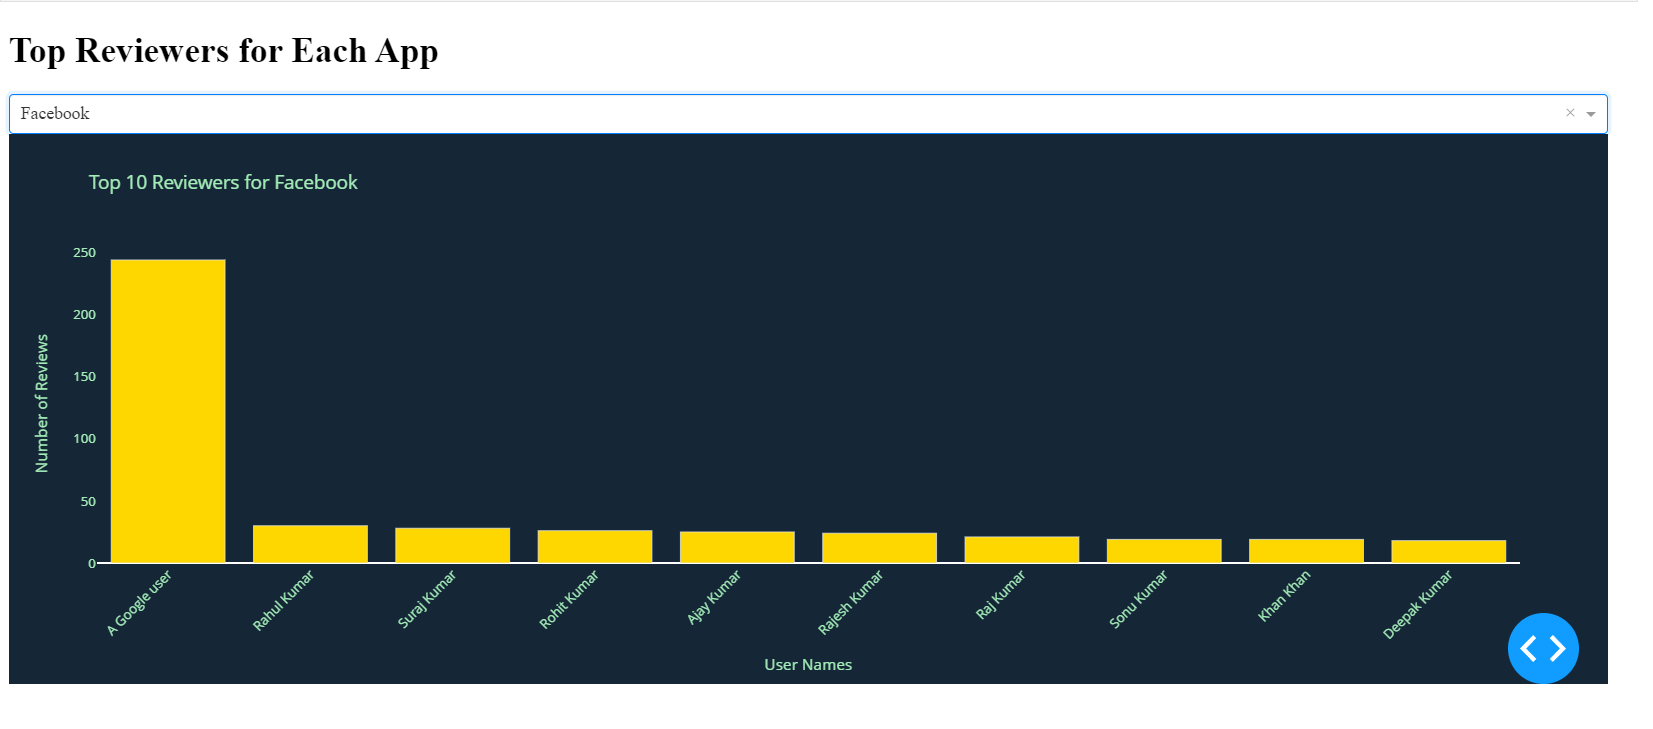
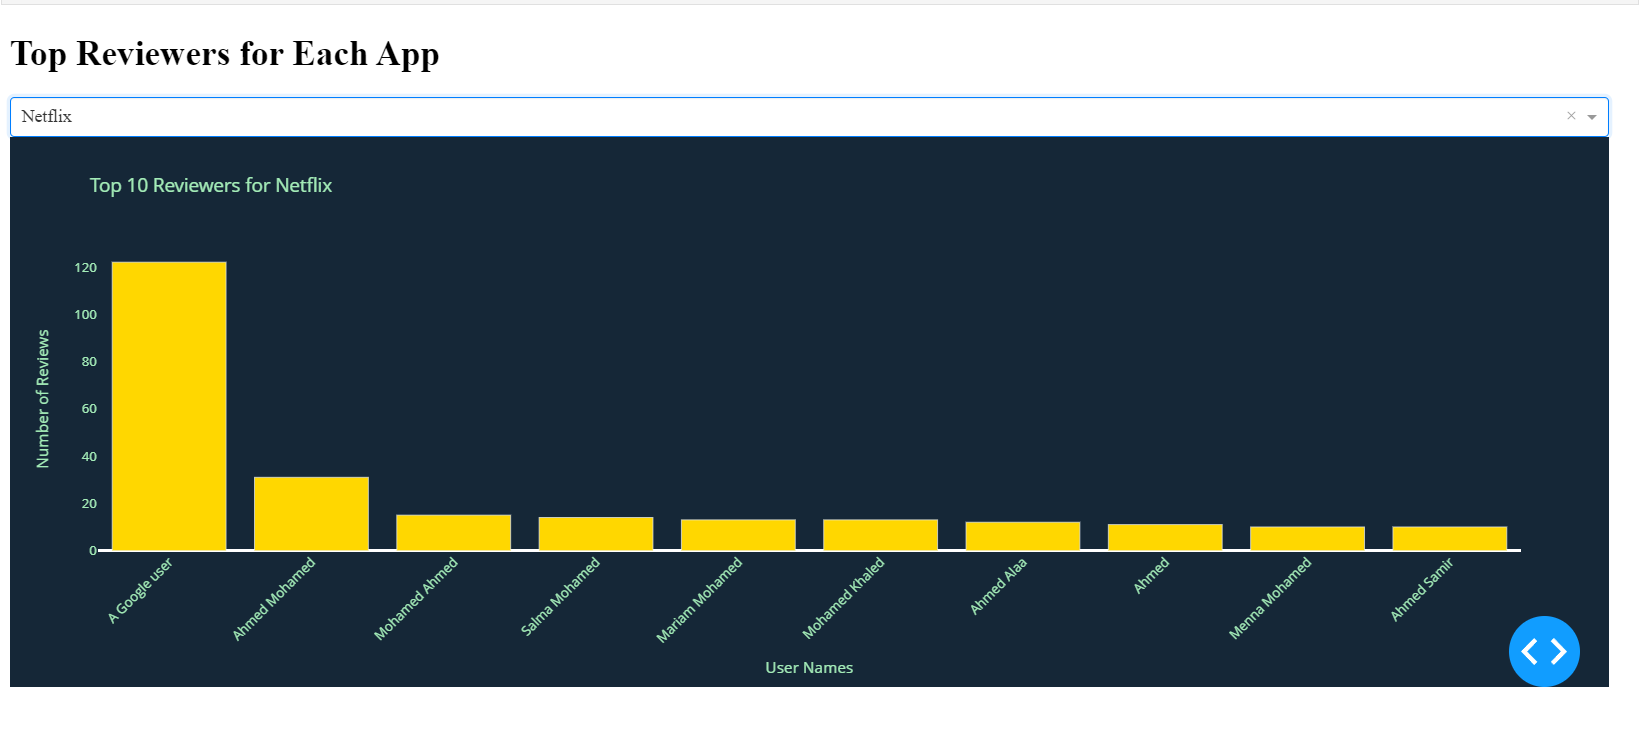
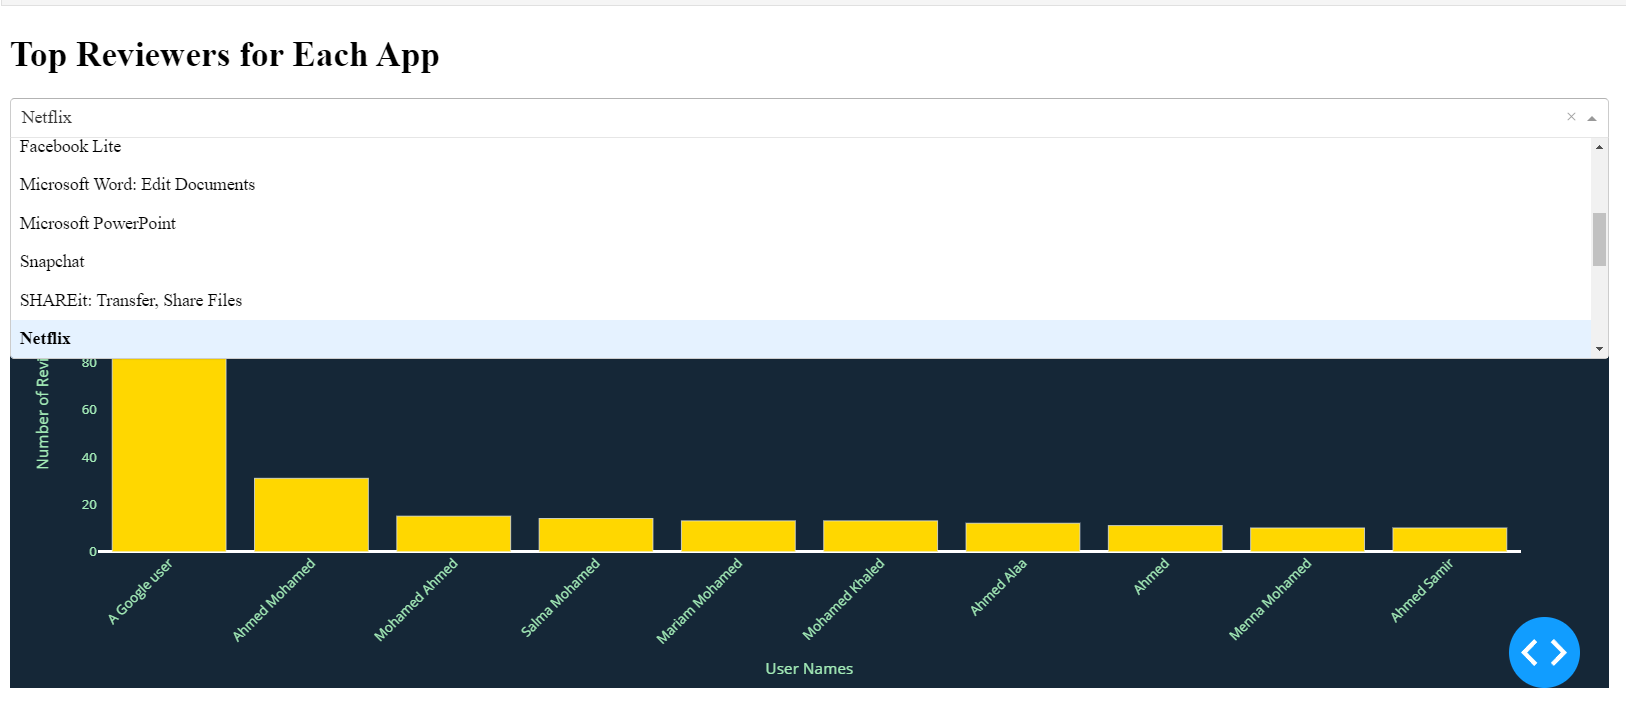

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Interactive Review Timeline: Tracking the Number of Reviews Over Time
</h4>


This code utilizes the Pandas and Plotly libraries to create an interactive line plot, providing a dynamic and insightful visualization of the review timeline. The DataFrame, `df_reviews`, contains data with review dates, and the code groups the reviews by date to calculate the number of reviews on each day. It then generates an interactive line plot that illustrates how the number of reviews changes over time. The x-axis represents the dates, while the y-axis displays the corresponding number of reviews. Users can hover over data points to view additional information, making it easier to identify patterns, trends, and potential correlations in user feedback. The plot is presented using a dark-themed layout for a visually appealing and engaging experience.

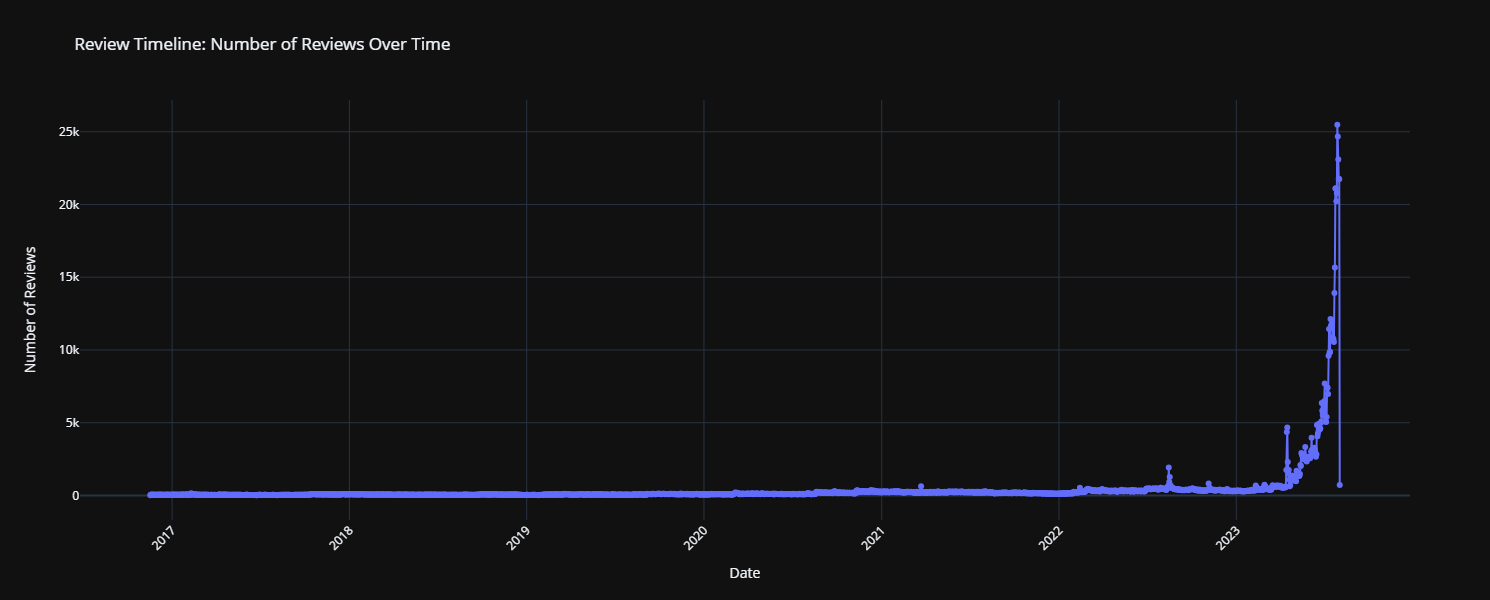

In [57]:
import pandas as pd
import plotly.graph_objects as go

# Drop rows with missing dates (NaN values)
# df_reviews = df_reviews.dropna(subset=['date'])

# Group by date and count the number of reviews on each day
review_timeline = df_reviews.groupby(df_reviews['date'].dt.date).size()

# Create an interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=review_timeline.index, y=review_timeline.values, mode='lines+markers', name='Number of Reviews'))
fig.update_layout(title='Review Timeline: Number of Reviews Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis=dict(tickangle=-45),
                  showlegend=False,
                  template='plotly_dark',
                  height=600,
                 )

fig.show()

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Interactive Review Timeline for the Year 2023: Analyzing the Number of Reviews Over Time
</h4>


This code utilizes Pandas and Plotly to create an interactive line plot that focuses on the year 2023. Assuming the 'date' column in the DataFrame `df_reviews` has been converted to the datetime type, the code filters the data to include only reviews from the year 2023. It then groups the reviews by date to calculate the number of reviews on each day during that year. The resulting data is used to generate an interactive line plot, where the x-axis represents the dates and the y-axis shows the corresponding number of reviews. Users can easily explore the data by hovering over data points to access more information. This interactive visualization allows for a more in-depth analysis of review trends, patterns, and potential insights specific to the year 2023. The plot is presented using a dark-themed layout for a visually appealing and immersive experience.

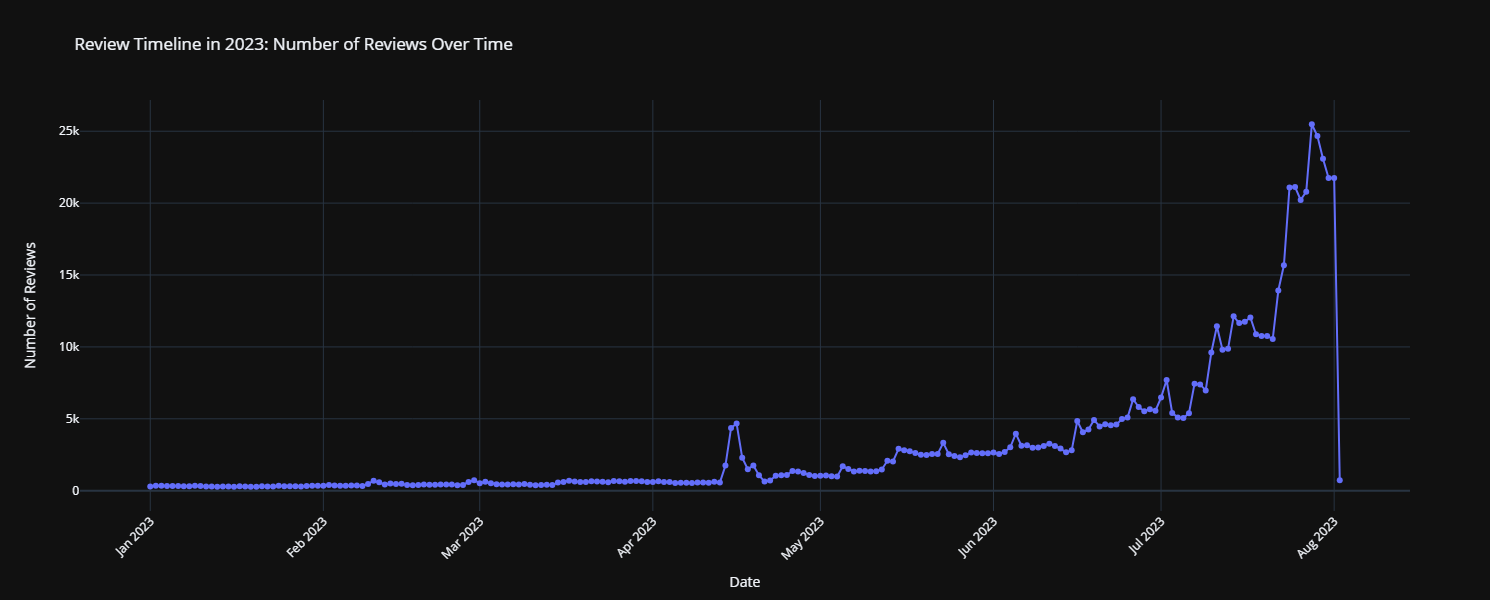

In [58]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have already converted the 'date' column to datetime type
# df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Filter the DataFrame to include only data from the year 2023
df_2023 = df_reviews[df_reviews['date'].dt.year == 2023]

# Group by date and count the number of reviews on each day
review_timeline_2023 = df_2023.groupby(df_2023['date'].dt.date).size()

# Create an interactive line plot for the year 2023
fig = go.Figure()
fig.add_trace(go.Scatter(x=review_timeline_2023.index, y=review_timeline_2023.values, mode='lines+markers', name='Number of Reviews'))
fig.update_layout(title='Review Timeline in 2023: Number of Reviews Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis=dict(tickangle=-45),
                  showlegend=False,
                  template='plotly_dark',
                  height=600,
                 )

fig.show()

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
App Ratings Comparison: Analyzing User Ratings for Different Apps
</h4>

Description:
This code generates an interactive horizontal bar chart using Plotly to compare the average user ratings of different mobile apps. The data is assumed to be in a DataFrame named 'df_reviews', containing columns 'app_name' and 'score' (user rating).

Question:
Which mobile apps have the highest average user ratings, and how do they compare to other apps in terms of minimum, maximum, median, and mode user ratings? The horizontal bar chart visualizes the average scores of various apps, providing valuable insights into the performance of each app based on user feedback. The hovertext displays additional details, such as the app name, mean rating, minimum rating, maximum rating, median rating, and mode rating, to facilitate easy comparisons and in-depth analysis.

The chart is designed to be interactive, allowing users to explore the ratings of different apps by hovering over the bars. The dark template enhances readability and aesthetics, making it ideal for use in data presentations and dashboards.

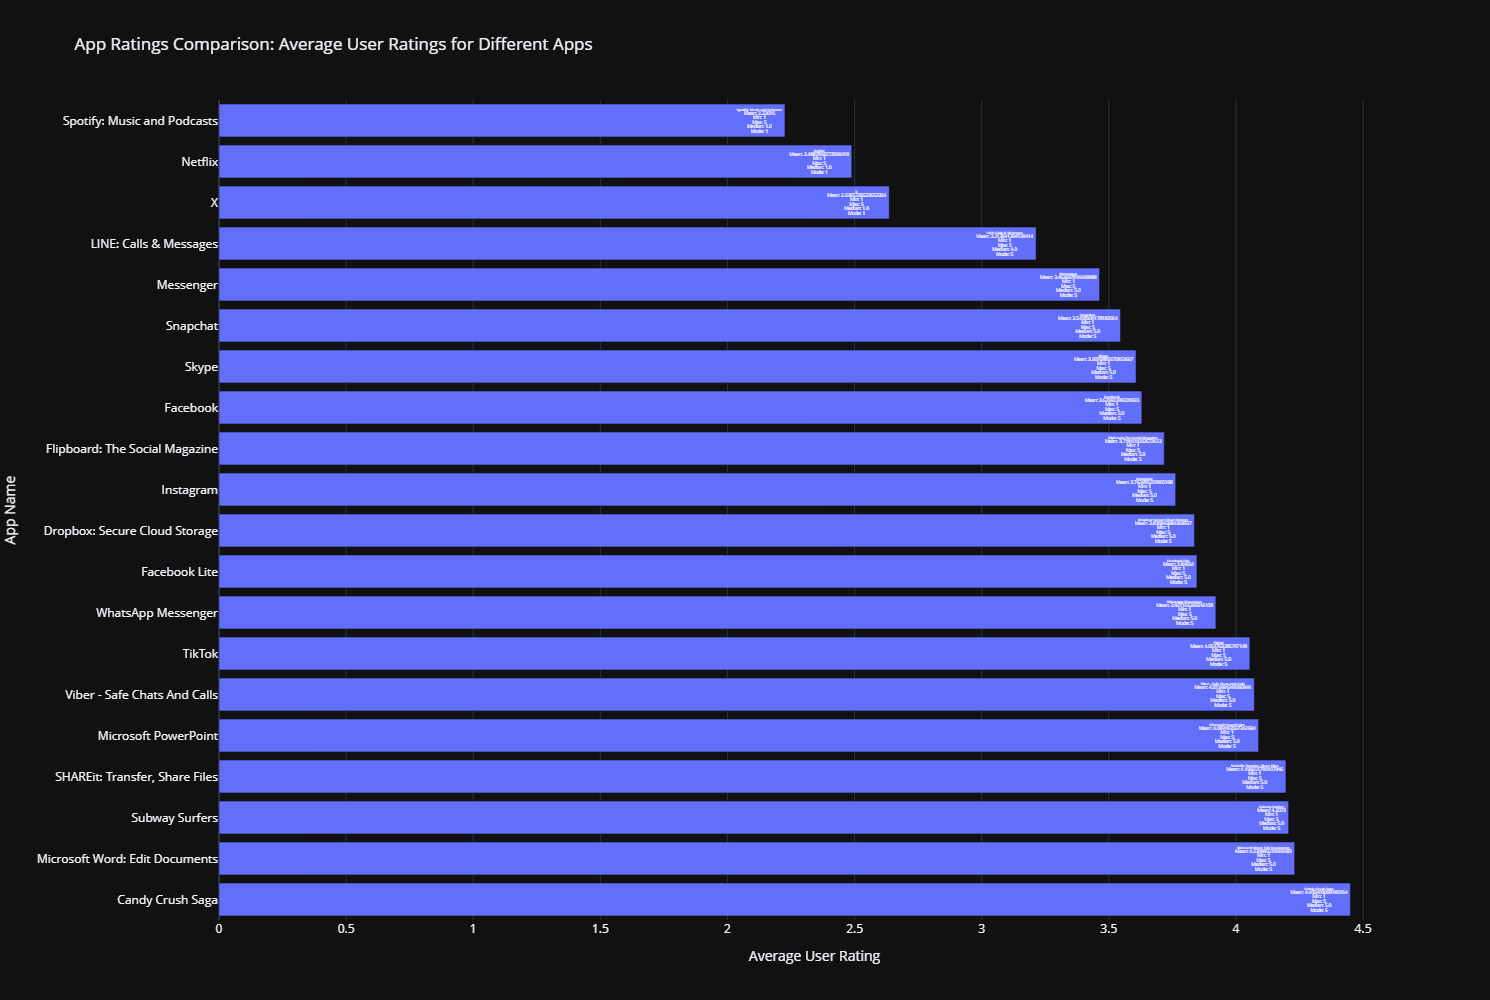

In [59]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'df_reviews' with columns 'app_name' and 'user_rating'

# Calculate the average, min, max, median, and mode user rating for each app
def calc_mode(x):
    return x.mode().iloc[0]

app_statistics = df_reviews.groupby('app_name')['score'].agg(['mean', 'min', 'max', 'median', calc_mode]).reset_index()

# Sort the apps based on average ratings in descending order
sorted_apps = app_statistics.sort_values(by='mean', ascending=False)

# Create a horizontal bar chart to compare the average scores of different apps
fig = go.Figure(data=go.Bar(
    x=sorted_apps['mean'],
    y=sorted_apps['app_name'],
    text=("<b>" + sorted_apps['app_name'] + "</b><br>" +
          "<span style='font-size: 16px;'>Mean: " + sorted_apps['mean'].astype(str) + "</span><br>" +
          "<span style='font-size: 16px;'>Min: " + sorted_apps['min'].astype(str) + "</span><br>" +
          "<span style='font-size: 16px;'>Max: " + sorted_apps['max'].astype(str) + "</span><br>" +
          "<span style='font-size: 16px;'>Median: " + sorted_apps['median'].astype(str) + "</span><br>" +
          "<span style='font-size: 16px;'>Mode: " + sorted_apps['calc_mode'].astype(str) + "</span>"),
    textposition='inside',
    orientation='h'
))

fig.update_layout(title='App Ratings Comparison: Average User Ratings for Different Apps',
                  xaxis_title='Average User Rating',
                  yaxis_title='App Name',
                  template='plotly_dark',
                  height=1000,
                  hovermode='closest'
                 )

fig.show()

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Review Timeline Dashboard by each App:
</h4>


The Review Timeline Dashboard is an interactive web application built using Dash, Plotly Express, and pandas. It allows users to visualize the number of reviews over time for different apps. The dashboard provides a dropdown menu to select the desired app and a date range picker to choose the specific time period. The line chart dynamically updates based on the user's selections, providing insights into user feedback patterns and trends.

In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html, Input, Output
from datetime import datetime



# Create a Dash app
app = dash.Dash(__name__)

# Get unique app names for dropdown options
app_names = df_reviews['app_name'].unique()

# Layout of the app
app.layout = html.Div([
    html.H1("Review Timeline: Number of Reviews Over Time for Each App"),
    html.Label("Select App:"),
    dcc.Dropdown(
        id='app-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in app_names],
        value=app_names[0],
    ),
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-range-picker',
        min_date_allowed=df_reviews['date'].min().date(),
        max_date_allowed=df_reviews['date'].max().date(),
        start_date=df_reviews['date'].min().date(),
        end_date=df_reviews['date'].max().date(),
    ),
    dcc.Graph(id='review-timeline-plot')
])

# Callback to update the plot based on dropdown and date range picker
@app.callback(
    Output('review-timeline-plot', 'figure'),
    Input('app-dropdown', 'value'),
    Input('date-range-picker', 'start_date'),
    Input('date-range-picker', 'end_date')
)
def update_review_timeline_plot(selected_app, start_date, end_date):
    # Convert the start and end dates back to datetime type
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Filter the DataFrame based on the selected app and date range
    filtered_reviews = df_reviews[(df_reviews['app_name'] == selected_app) & 
                                  (df_reviews['date'].between(start_date, end_date))]

    # Group by date and count the number of reviews on each day
    review_timeline = filtered_reviews.groupby(filtered_reviews['date'].dt.date).size()

    # Create the interactive line plot
    fig = px.line(
        review_timeline,
        x=review_timeline.index,
        y=review_timeline.values,
        labels={'x': 'Date', 'y': 'Number of Reviews'},
        title=f"Review Timeline for {selected_app}",
    )
    fig.update_layout(template='plotly_dark', hovermode='x')
    fig.update_traces(mode='markers+lines')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

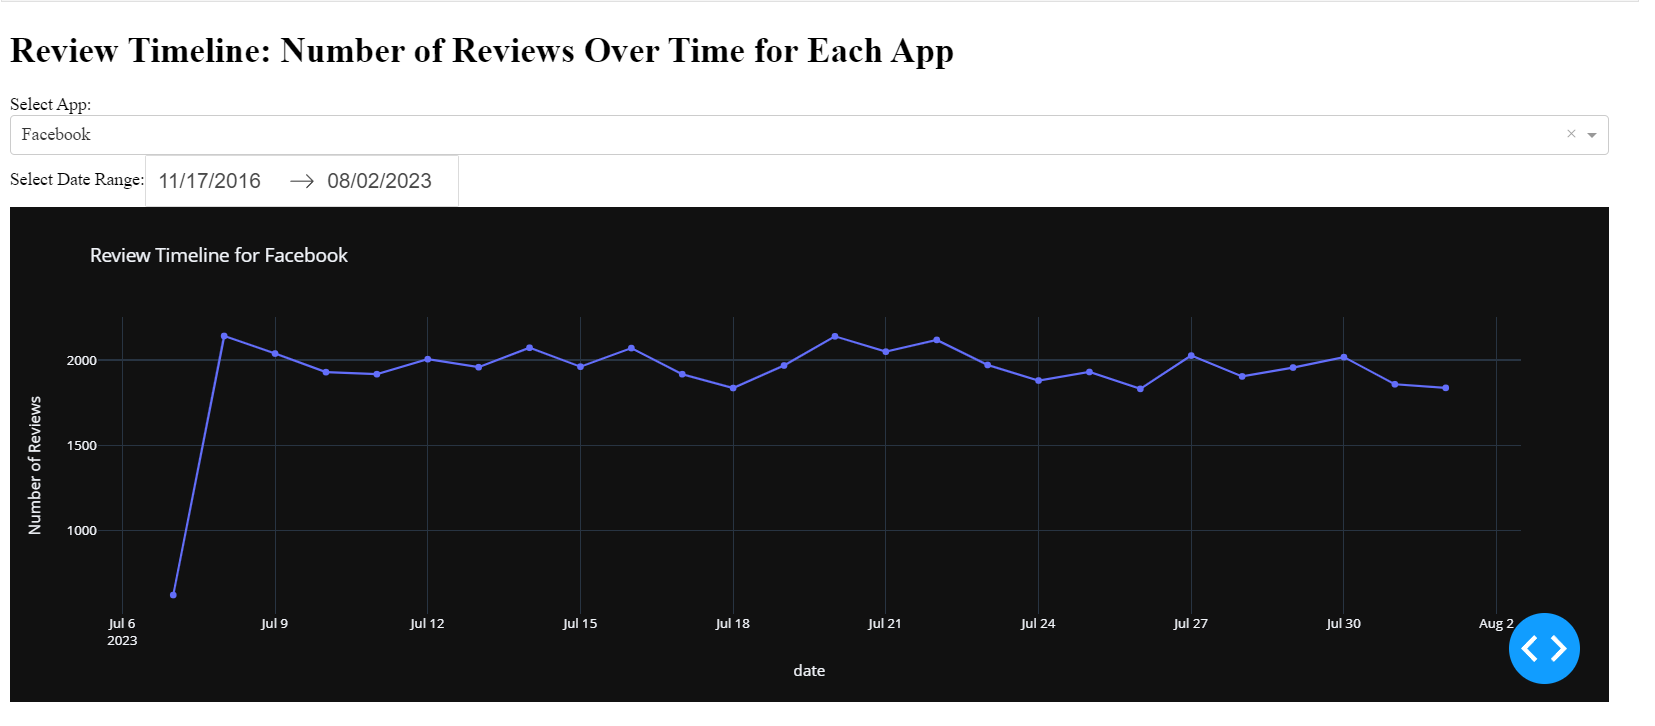
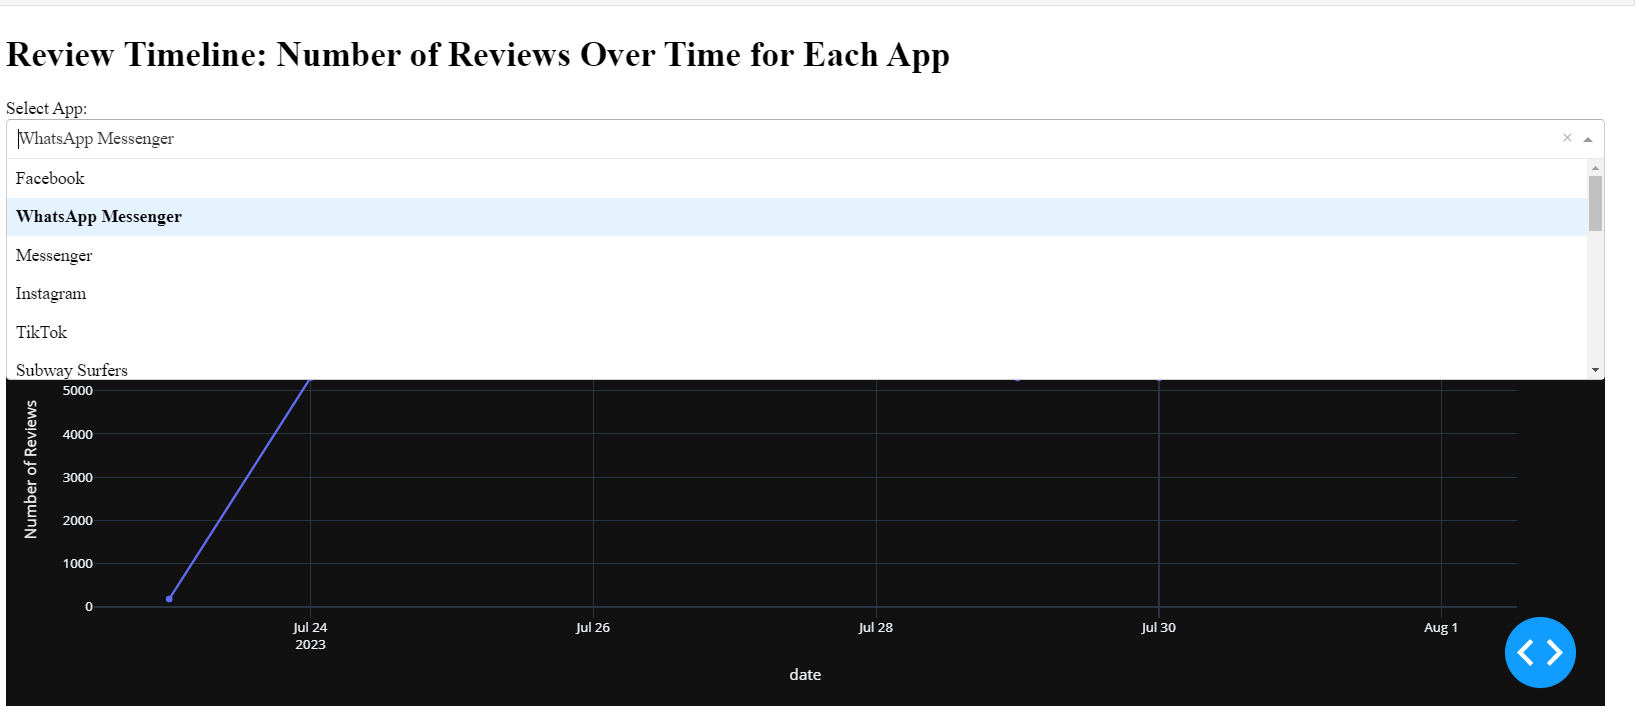
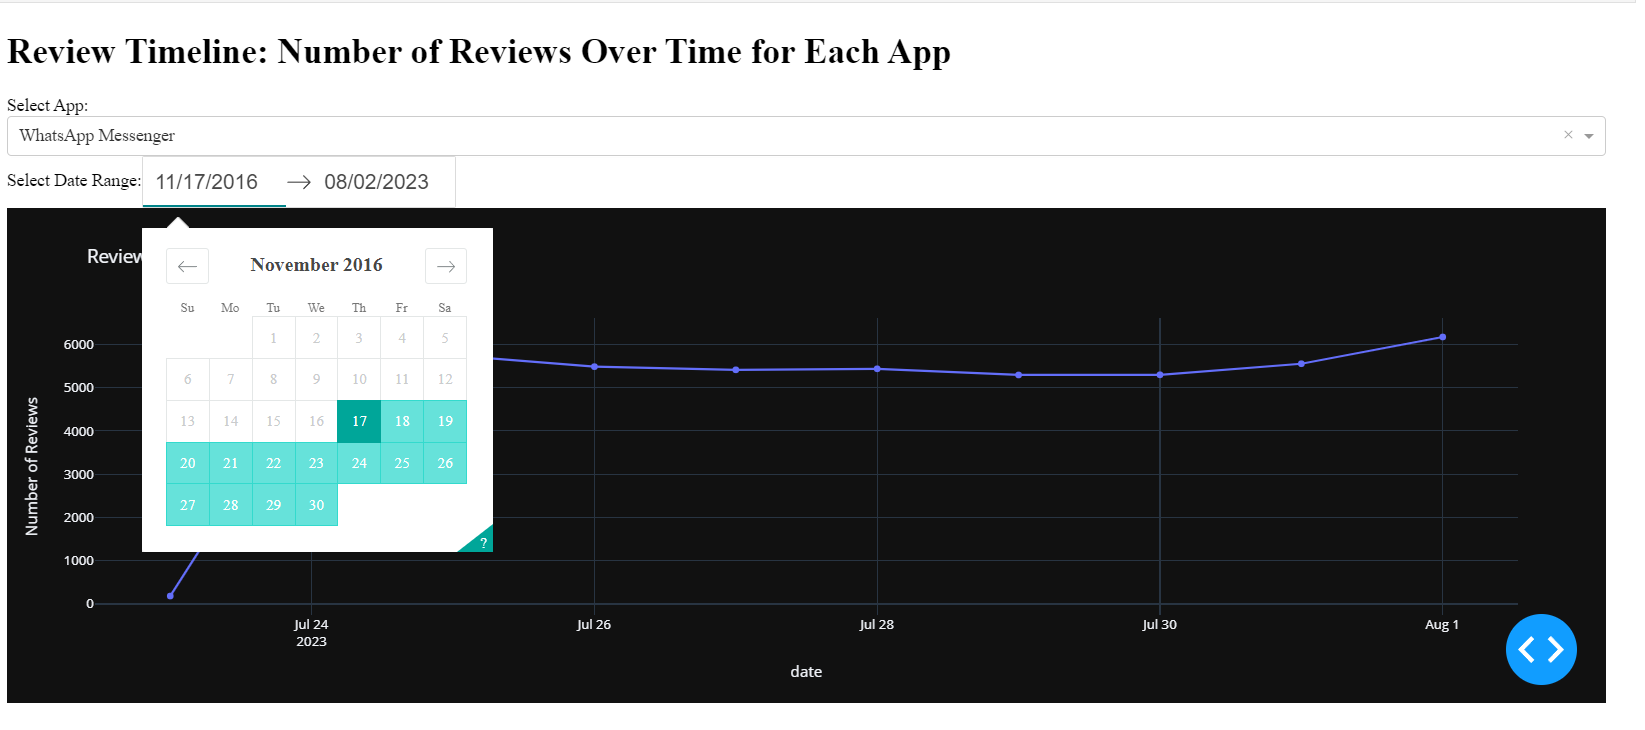
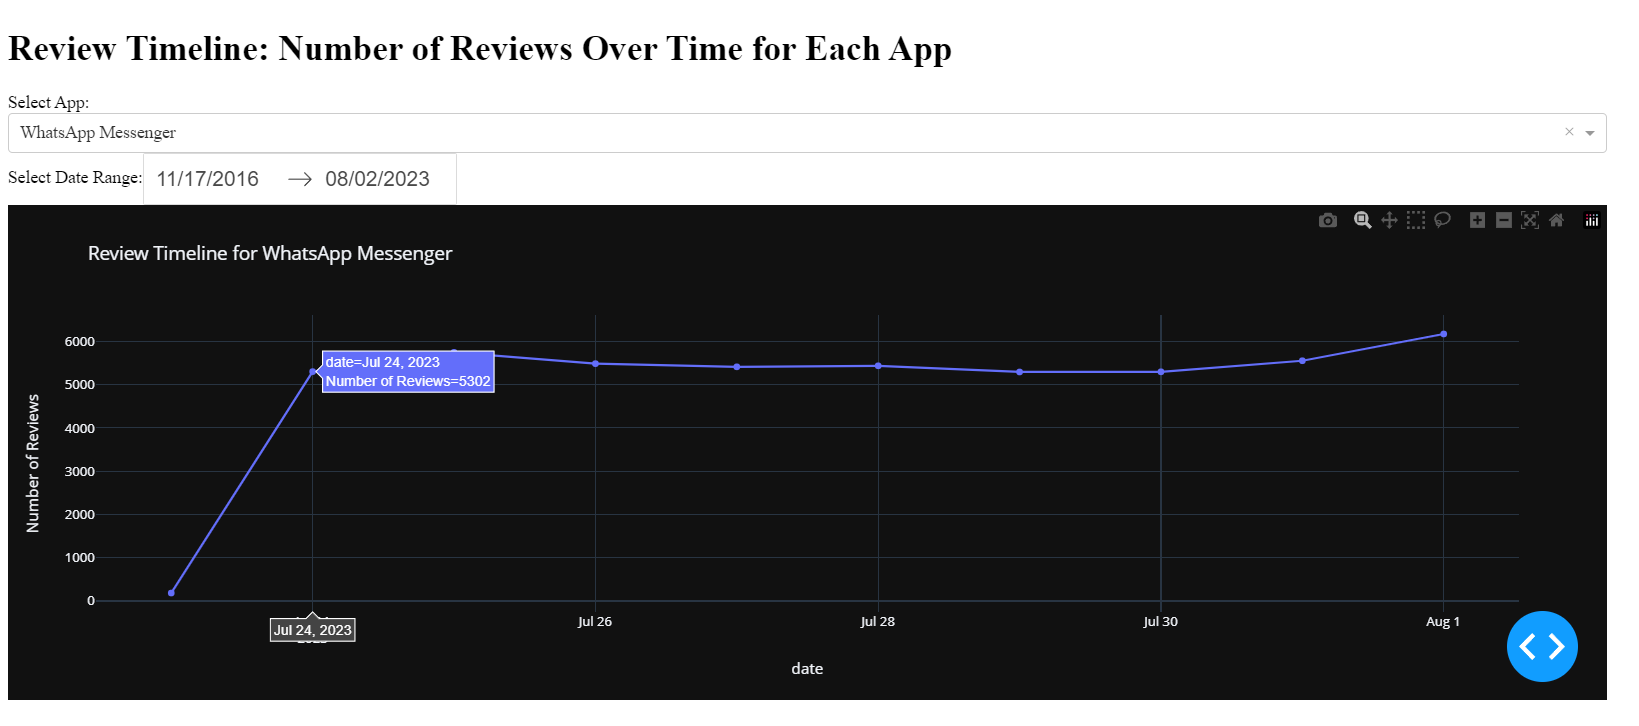

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Word Cloud of Review Text: What Are Users Talking About?
</h4>

This code creates a word cloud from review text using Python's pandas, matplotlib, and WordCloud libraries. The review text is extracted from a DataFrame named "df_reviews," and all the review texts are concatenated into a single string. The WordCloud object is then initialized with custom settings, such as width, height, background color (black), stopwords (commonly occurring words to exclude), and colormap. The code generates a colorful and visually appealing word cloud representing the most frequently used words in the reviews.

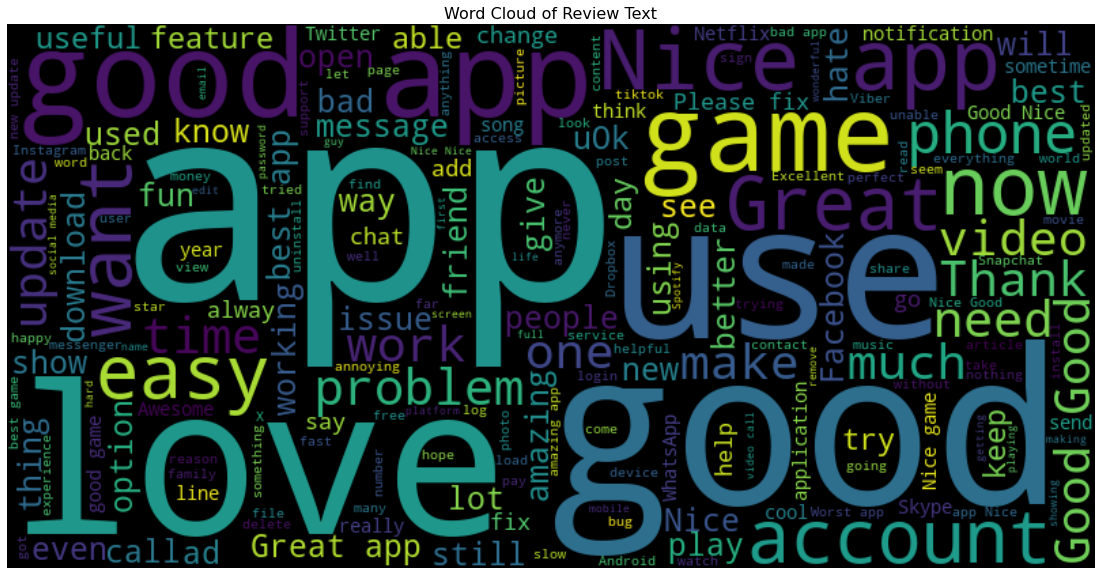

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Concatenate all review text into a single string
all_reviews_text = ' '.join(df_reviews['review'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=set(STOPWORDS), colormap='viridis').generate(all_reviews_text)

# Plot the WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text', fontsize=16)
plt.show()

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
Word Cloud Dashboard: Visualizing Most Frequently Used Words in App Reviews
</h4>

This Python code creates a dashboard using Dash to visualize the most frequently used words in app reviews. The code utilizes a DataFrame named 'df_reviews' with columns 'app_name', 'review_text', and 'date' as the data source. The dashboard allows users to select the number of apps to compare, choose the app names, and specify a date range for analyzing the reviews.

**Question:** Want to gain valuable insights from app reviews at a glance? This Python code creates a dynamic Word Cloud Dashboard using Dash, enabling users to analyze and compare the most commonly used words in app reviews across different apps and time periods. Explore the Word Clouds and uncover what users are saying about your favorite apps!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from datetime import datetime

# Assuming you have a DataFrame named 'df_reviews' with columns 'app_name', 'review_text', and 'date'

# Create a Dash app
app = dash.Dash(__name__)

# Get unique app names for dropdown options
app_names = df_reviews['app_name'].unique()

# Layout of the app
app.layout = html.Div(    
         style={
        'background-color': 'white',  # Set the background color to black
        'width': '80%',  # Set the width of the content to 80%
        'margin': 'auto',  # Center align the content
        'padding': '20px',  # Add some padding around the content
    },
    children=[
    html.H1("Word Cloud: Most Frequently Used Words in Reviews"),
    
    html.Label("Number of Apps to Compare:"),
    dcc.Slider(
        id='num-apps-slider',
        min=1,
        max=len(app_names),
        value=3,
        marks={i: str(i) for i in range(1, len(app_names) + 1)},
        step=1
    ),
    
    html.Label("Select App Names:"),
    dcc.Dropdown(
        id='app-names-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in app_names],
        value=app_names[:3],
        multi=True
    ),
    
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-range-picker',
        min_date_allowed=df_reviews['date'].min().date(),
        max_date_allowed=df_reviews['date'].max().date(),
        start_date=df_reviews['date'].min().date(),
        end_date=df_reviews['date'].max().date(),
    ),
    
    html.Div(id='word-clouds-container', style={'display': 'flex', 'flex-wrap': 'wrap'}),
])

# Callback to update the word clouds based on dropdown and date range picker
@app.callback(
    Output('word-clouds-container', 'children'),
    Input('num-apps-slider', 'value'),
    Input('app-names-dropdown', 'value'),
    Input('date-range-picker', 'start_date'),
    Input('date-range-picker', 'end_date')
)
def update_word_clouds(num_apps, selected_apps, start_date, end_date):
    # Convert the start and end dates back to datetime type
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    
    word_clouds = []
    for app_name in selected_apps[:num_apps]:
        # Filter the DataFrame based on the selected app and date range
        filtered_reviews = df_reviews[(df_reviews['app_name'] == app_name) & 
                                      (df_reviews['date'].between(start_date, end_date))]
        
        # Combine all review text into a single string
        all_reviews_text = ' '.join(filtered_reviews['review'].astype(str))
        
        # Create a WordCloud object with a black background
        wordcloud = WordCloud(background_color='black', width=800, height=600).generate(all_reviews_text)

        # Create a div to hold the word cloud image with the app name above it
        word_cloud_div = html.Div([
            html.H3(app_name, style={'color': 'black'}),
            html.Img(src=wordcloud.to_image(), style={'width': '100%', 'height': '800px', 'margin': 'auto'}),
        ], style={'width': '100%', 'text-align': 'center'})
        
        word_clouds.append(word_cloud_div)
    
    return word_clouds

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

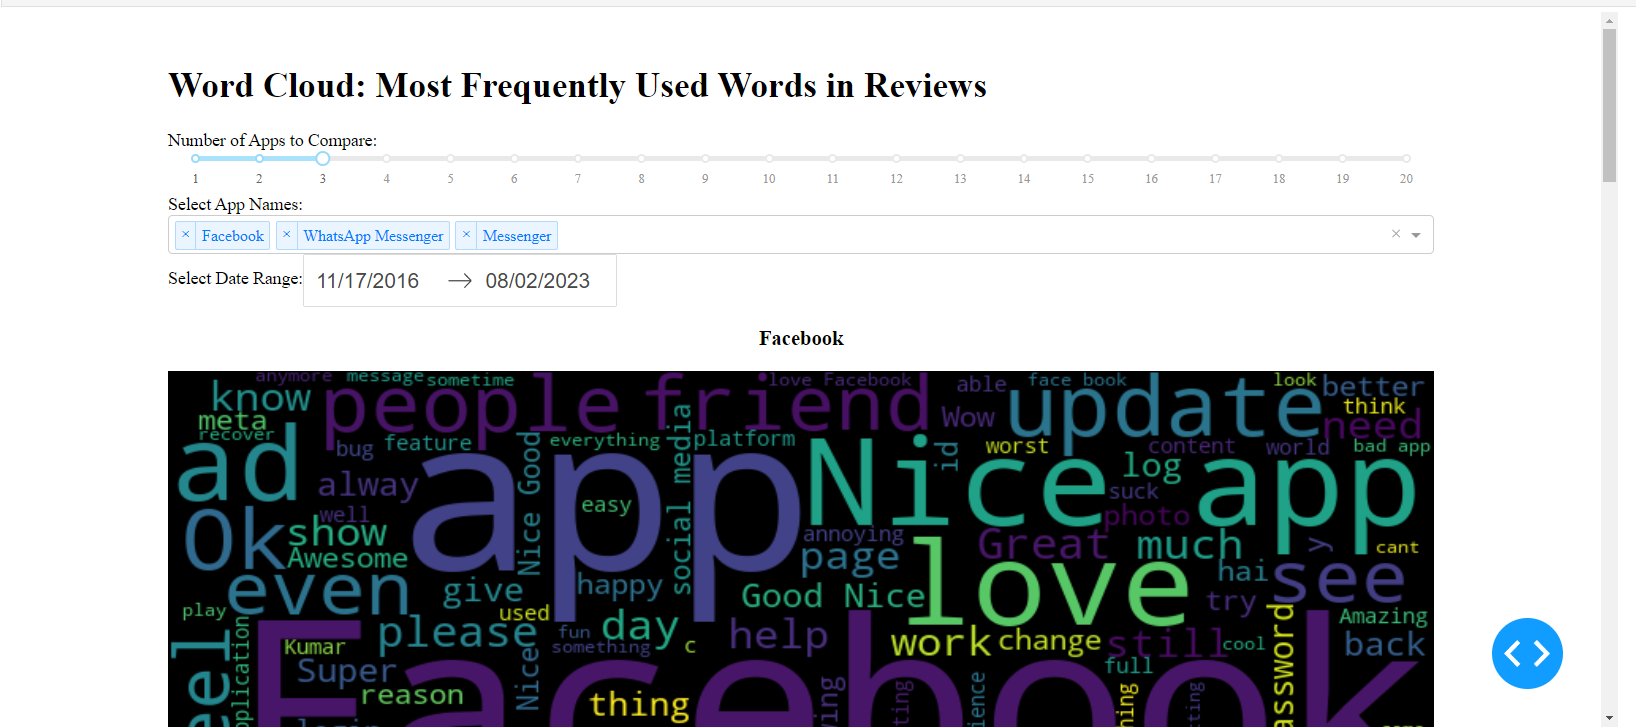
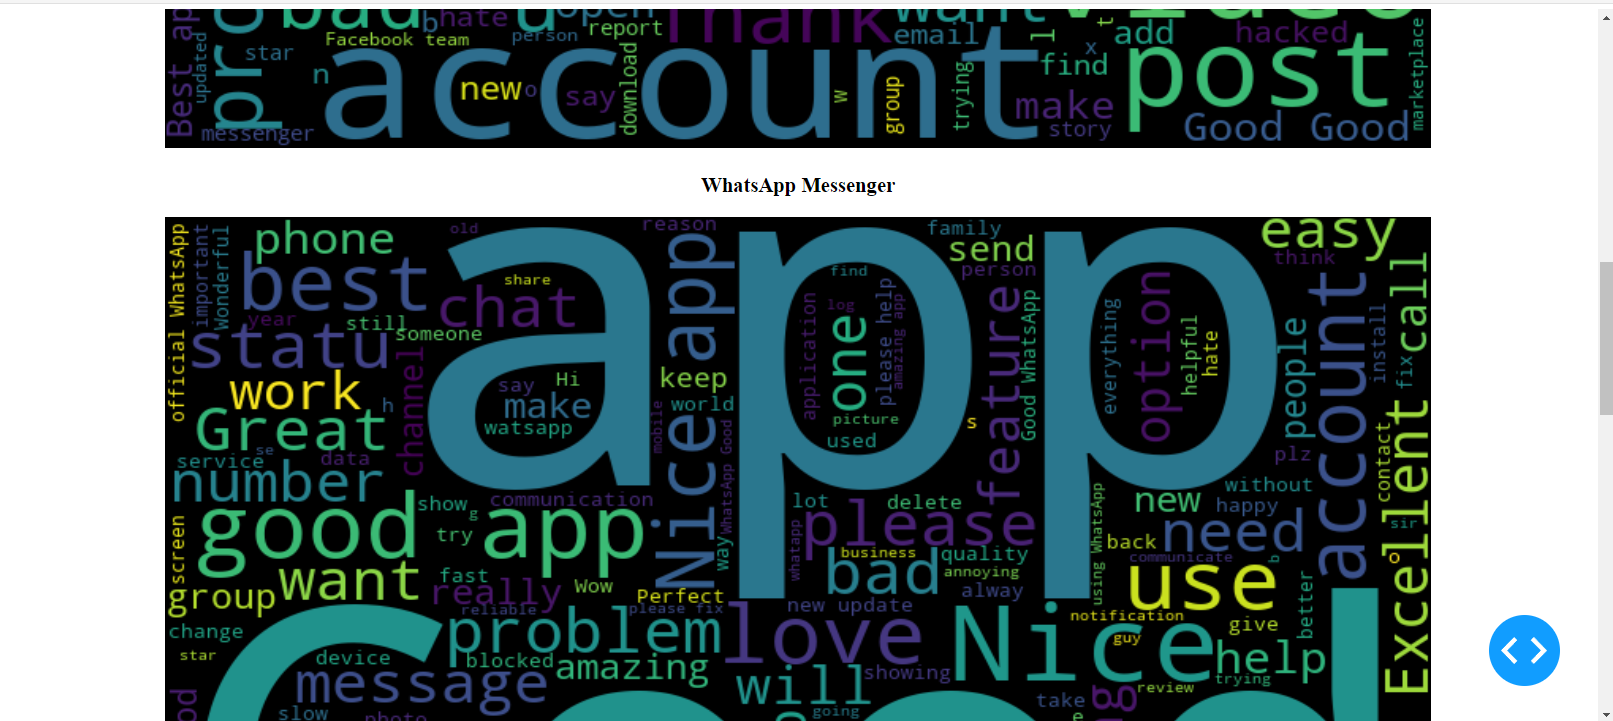
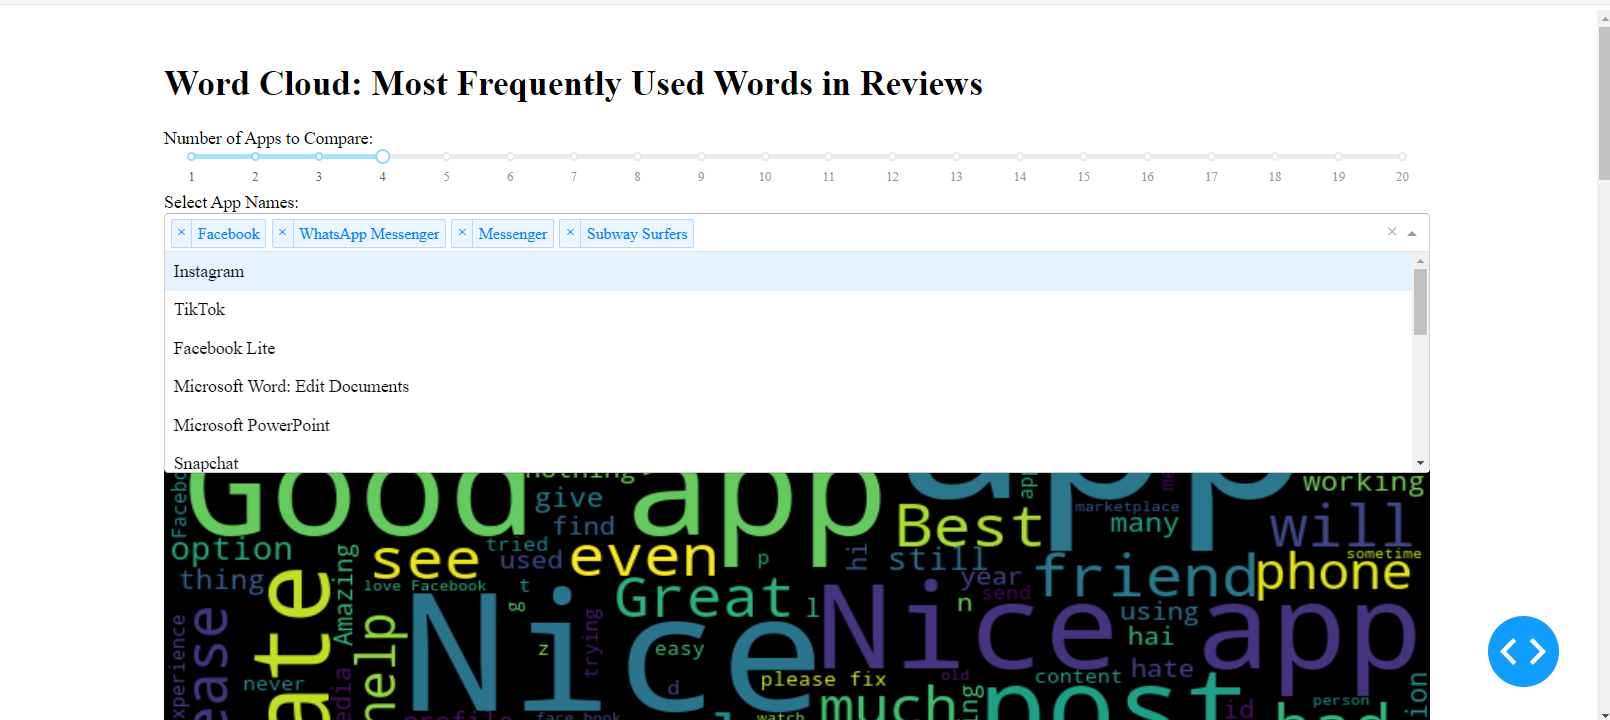
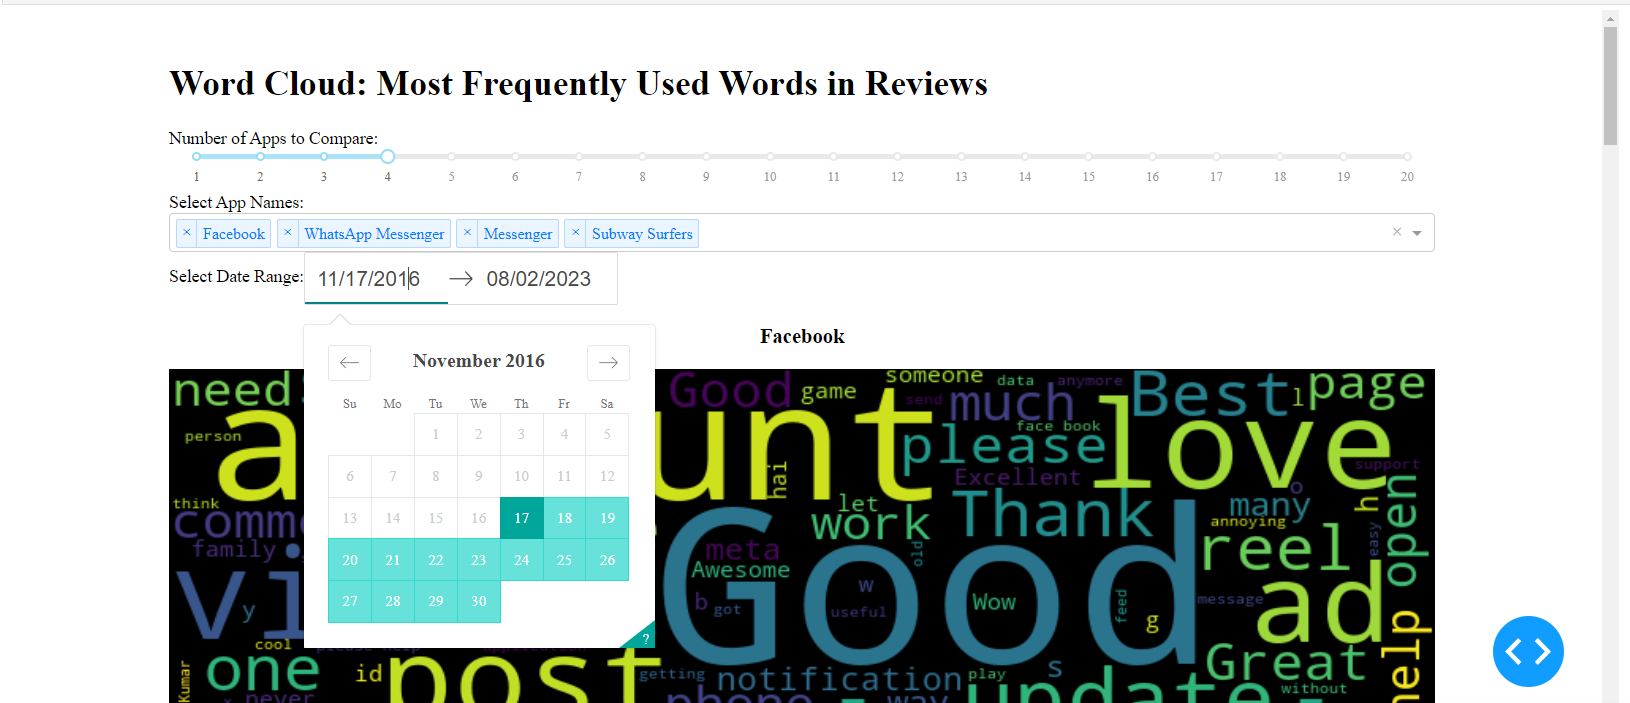

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from datetime import datetime

# Assuming you have a DataFrame named 'df_reviews' with columns 'app_name', 'review_text', and 'date'

# Create a Dash app
app = dash.Dash(__name__)

# Get unique app names for dropdown options
app_names = df_reviews['app_name'].unique()

# Layout of the app
app.layout = html.Div(    
         style={
        'background-color': '#111111',  # Set the background color to black
        'width': '100%',  # Set the width of the content to 80%
        'margin': 'auto',  # Center align the content
        #'padding': '20px',  # Add some padding around the content
    },
    children=[
    html.H1("Word Cloud: Most Frequently Used Words in Reviews", style={'color': 'white', 'text-align': 'center'}),
    
    html.Label("Number of Apps to Compare:"),
    dcc.Slider(
        id='num-apps-slider',
        min=1,
        max=len(app_names),
        value=3,
        marks={i: str(i) for i in range(1, len(app_names) + 1)},
        step=1
    ),
    
    html.Label("Select App Names:"),
    dcc.Dropdown(
        id='app-names-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in app_names],
        value=app_names[:3],
        multi=True
    ),
    
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-range-picker',
        min_date_allowed=df_reviews['date'].min().date(),
        max_date_allowed=df_reviews['date'].max().date(),
        start_date=df_reviews['date'].min().date(),
        end_date=df_reviews['date'].max().date(),
    ),
    
    html.Div(id='word-clouds-container', style={'display': 'flex', 'flex-wrap': 'wrap'}),
])

# Callback to update the word clouds based on dropdown and date range picker
@app.callback(
    Output('word-clouds-container', 'children'),
    Input('num-apps-slider', 'value'),
    Input('app-names-dropdown', 'value'),
    Input('date-range-picker', 'start_date'),
    Input('date-range-picker', 'end_date')
)
def update_word_clouds(num_apps, selected_apps, start_date, end_date):
    # Convert the start and end dates back to datetime type
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    
    word_clouds = []
    for app_name in selected_apps[:num_apps]:
        # Filter the DataFrame based on the selected app and date range
        filtered_reviews = df_reviews[(df_reviews['app_name'] == app_name) & 
                                      (df_reviews['date'].between(start_date, end_date))]
        
        # Combine all review text into a single string
        all_reviews_text = ' '.join(filtered_reviews['review'].astype(str))
        
        # Create a WordCloud object with a black background
        wordcloud = WordCloud(background_color='black', width=800, height=600).generate(all_reviews_text)

        # Create a div to hold the word cloud image with the app name above it
        word_cloud_div = html.Div([
            html.H3(app_name, style={'color': 'white'}),
            html.Img(src=wordcloud.to_image(), style={'width': '80%', 'height': '600px', 'margin': 'auto'}),
        ], style={'width': '100%', 'text-align': 'center'})
        
        word_clouds.append(word_cloud_div)
    
    return word_clouds

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

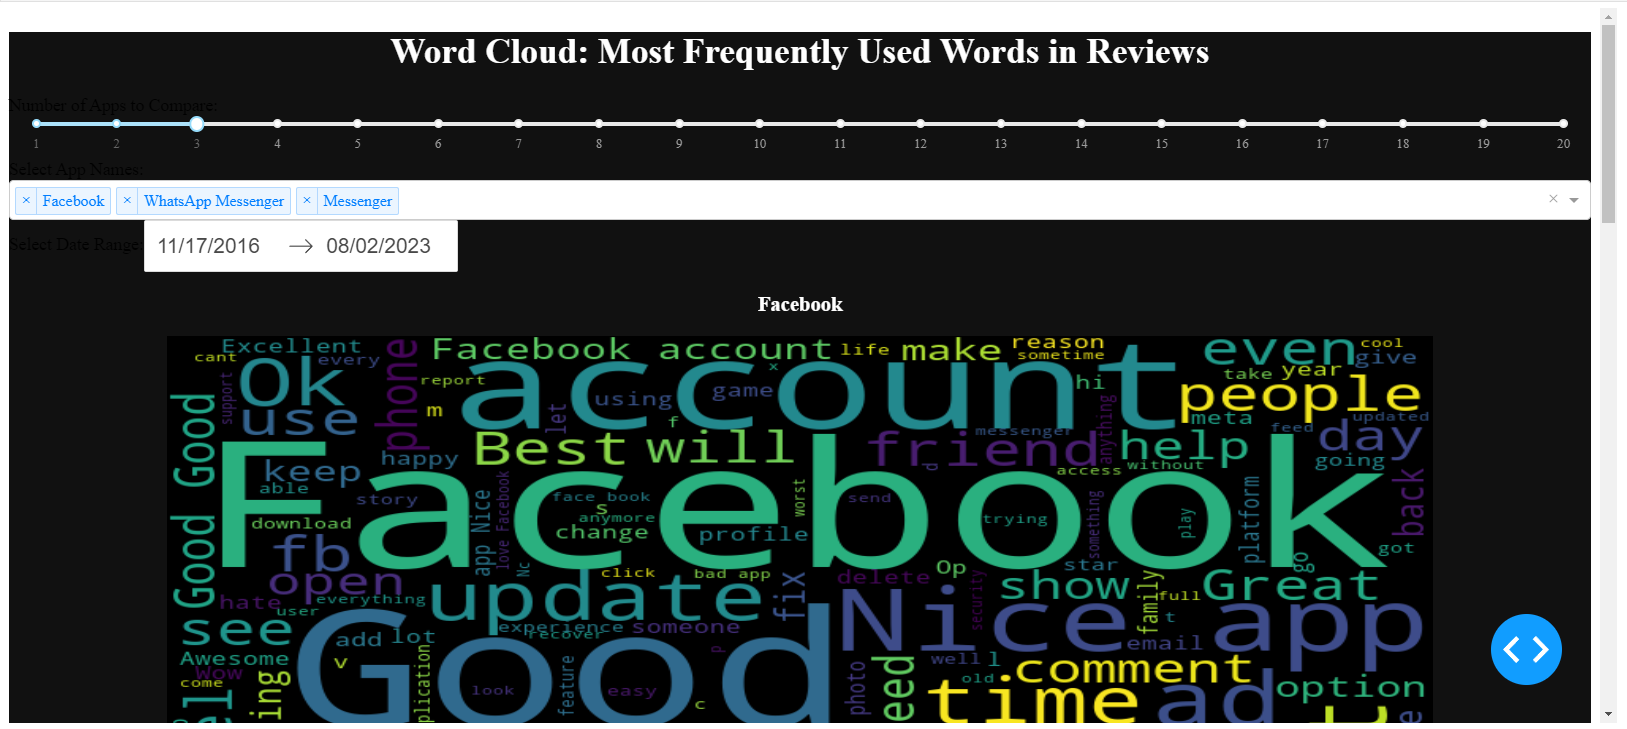
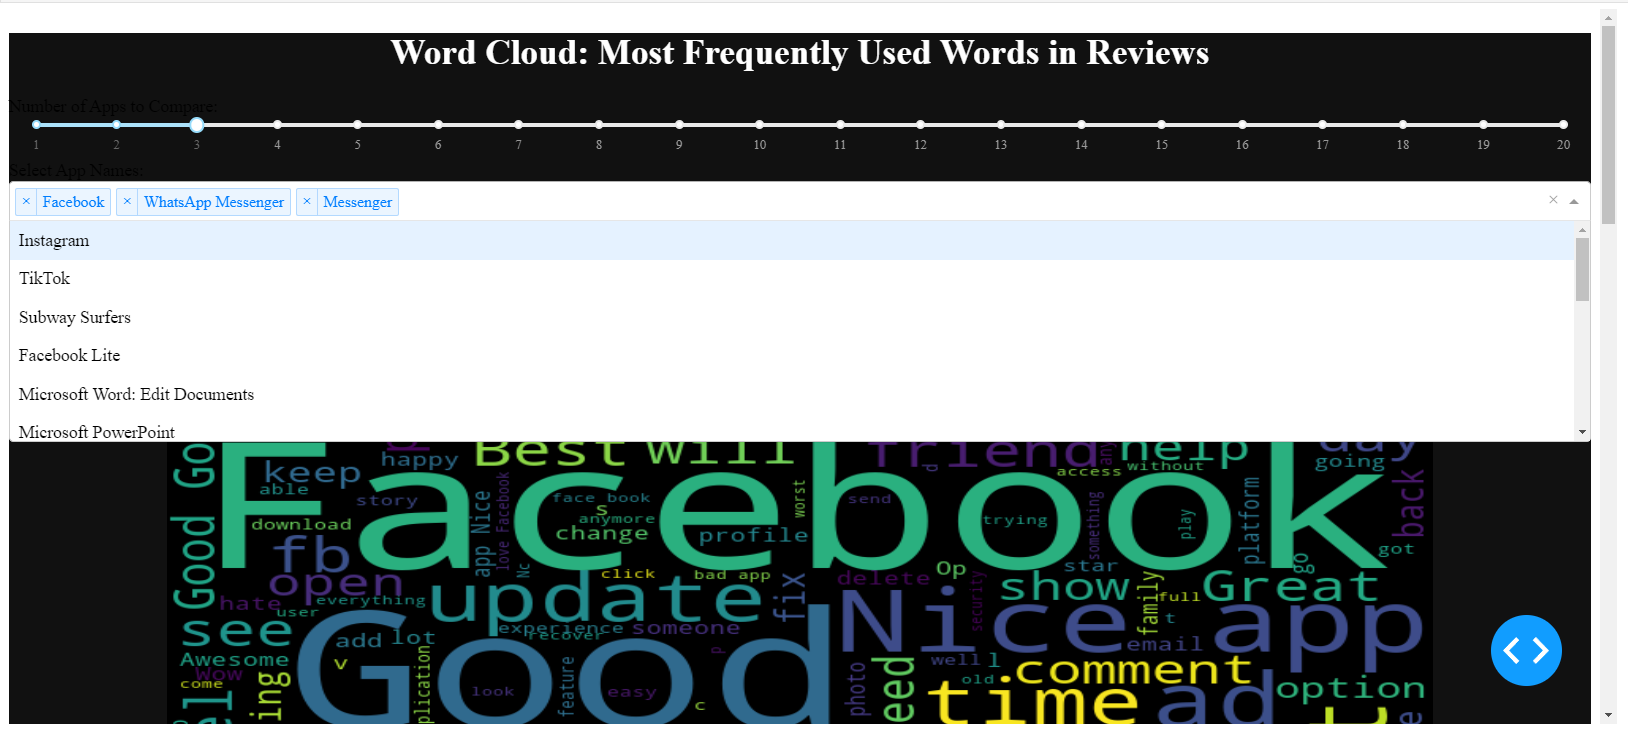
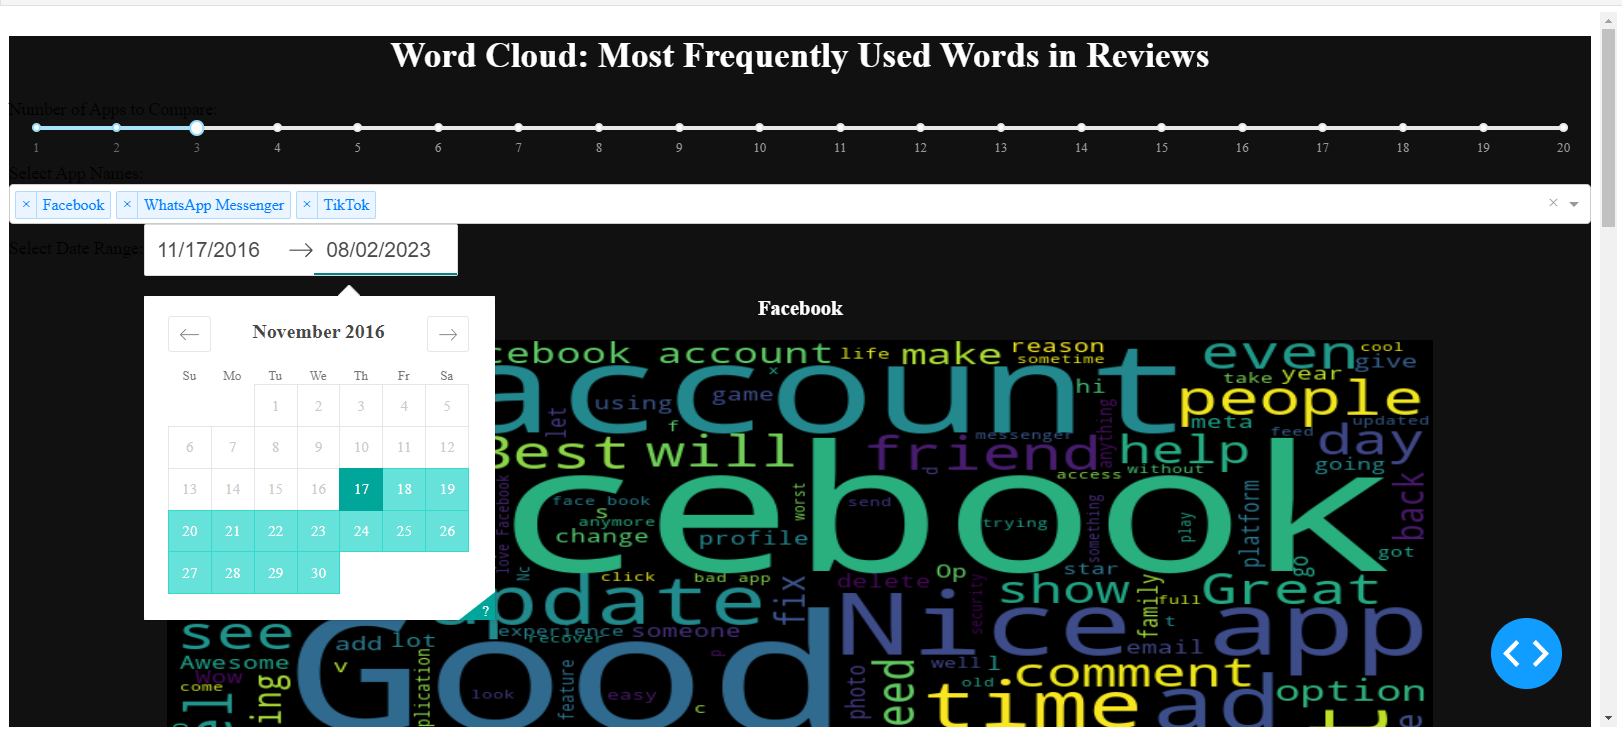

####
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
 App Version Analysis: Identifying Top and Bottom Versions Based on User Ratings
</h4>

This interactive dashboard allows users to analyze different versions of mobile applications and their corresponding user ratings. By selecting an app from the dropdown menu, users can view a bar chart showing the top 10 versions of the chosen app based on the highest user scores. Similarly, the dashboard displays another bar chart for the bottom 10 versions, highlighting those with the lowest user ratings. This analysis helps developers and product managers understand which versions are performing exceptionally well and identify areas for improvement in order to enhance the overall user experience and satisfaction

In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html, Input, Output


# Create a Dash app
app = dash.Dash(__name__)

# Get unique app names for dropdown options
app_names = df_reviews['app_name'].unique()

# Layout of the app
app.layout = html.Div(
    style={
        'backgroundColor': 'white',  # Set the background color of the entire layout
        'width': '80%',  # Set the width of the content to 80%
        'margin': 'auto',  # Center align the content
        'padding': '20px',  # Add some padding around the content
    },
    children=[
        html.H1("App Version Analysis: Top and Bottom Versions by Score", style={'color': 'black'}), # Set title color to black
        html.Label("Select App:"),
        dcc.Dropdown(
            id='app-dropdown',
            options=[{'label': app_name, 'value': app_name} for app_name in app_names],
            value=app_names[0]
        ),
        dcc.Graph(
            id='top-versions-chart',
            style={'backgroundColor': 'white'},  # Set the plot background color to white
        ),
        dcc.Graph(
            id='bottom-versions-chart',
            style={'backgroundColor': 'white'},  # Set the plot background color to white
        )
    ]
)

# Callback to update top versions chart based on selected app
@app.callback(
    Output('top-versions-chart', 'figure'),
    Input('app-dropdown', 'value')
)
def update_top_versions_chart(selected_app):
    filtered_data = df_reviews[df_reviews['app_name'] == selected_app]
    top_versions = filtered_data.nlargest(10, 'score')
    fig = px.bar(top_versions, x='app_version', y='score', title=f'Top 10 Versions of {selected_app}')
    return fig

# Callback to update bottom versions chart based on selected app
@app.callback(
    Output('bottom-versions-chart', 'figure'),
    Input('app-dropdown', 'value')
)
def update_bottom_versions_chart(selected_app):
    filtered_data = df_reviews[df_reviews['app_name'] == selected_app]
    bottom_versions = filtered_data.nsmallest(10, 'score')
    fig = px.bar(bottom_versions, x='app_version', y='score', title=f'Bottom 10 Versions of {selected_app}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Important:** In case the interactive visualization isn't visible, you can refer to the images provided below. Please note that the current setup requires the code to be hosted on a server, a step that will be implemented in the future.

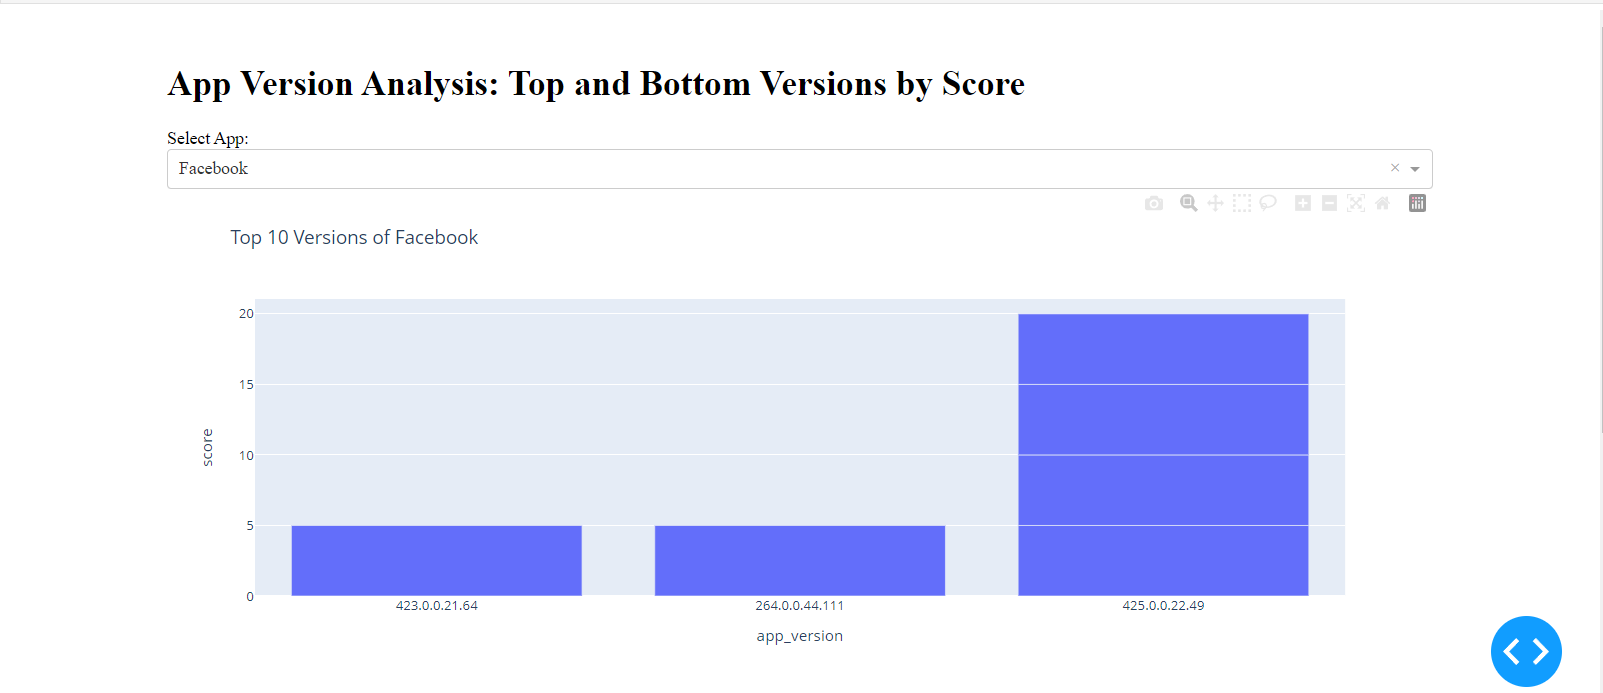
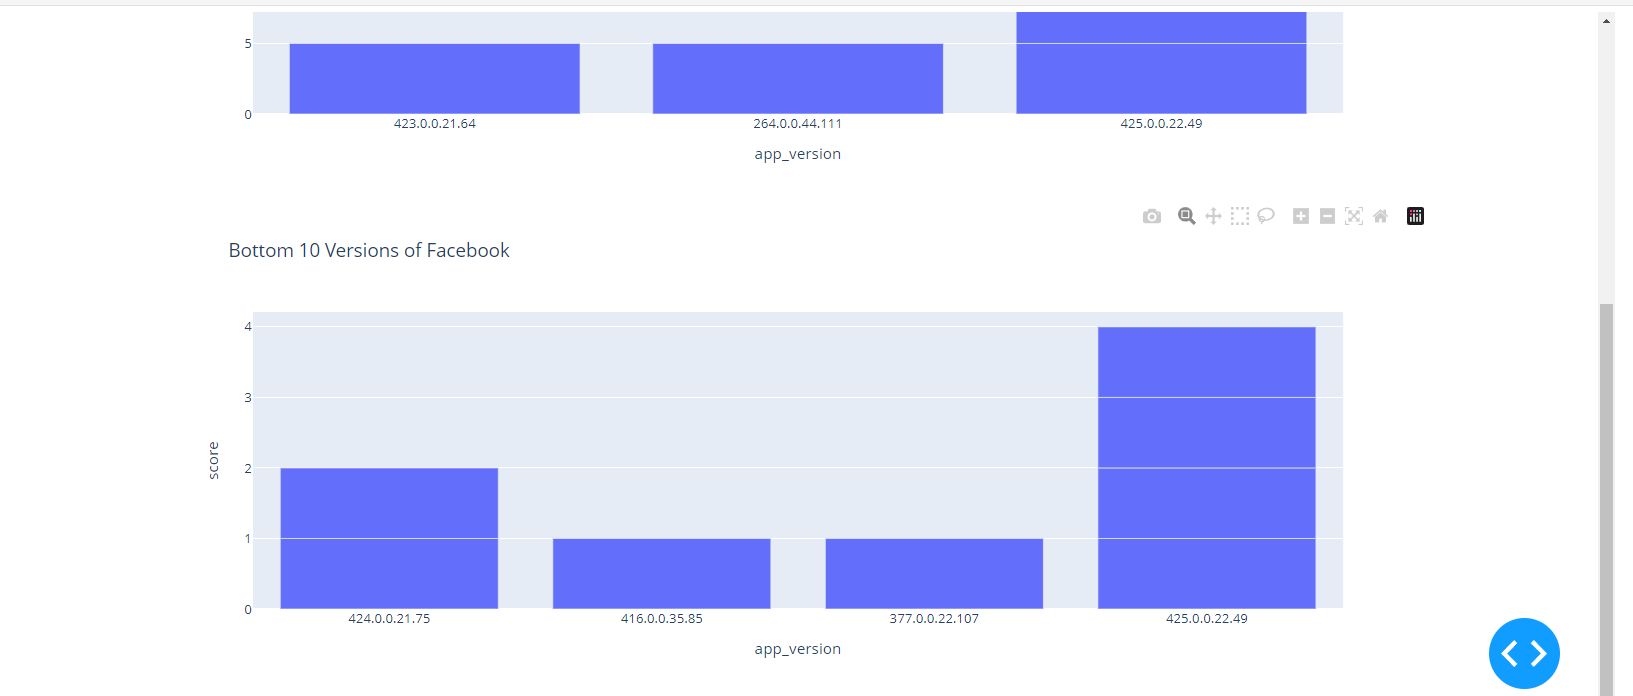
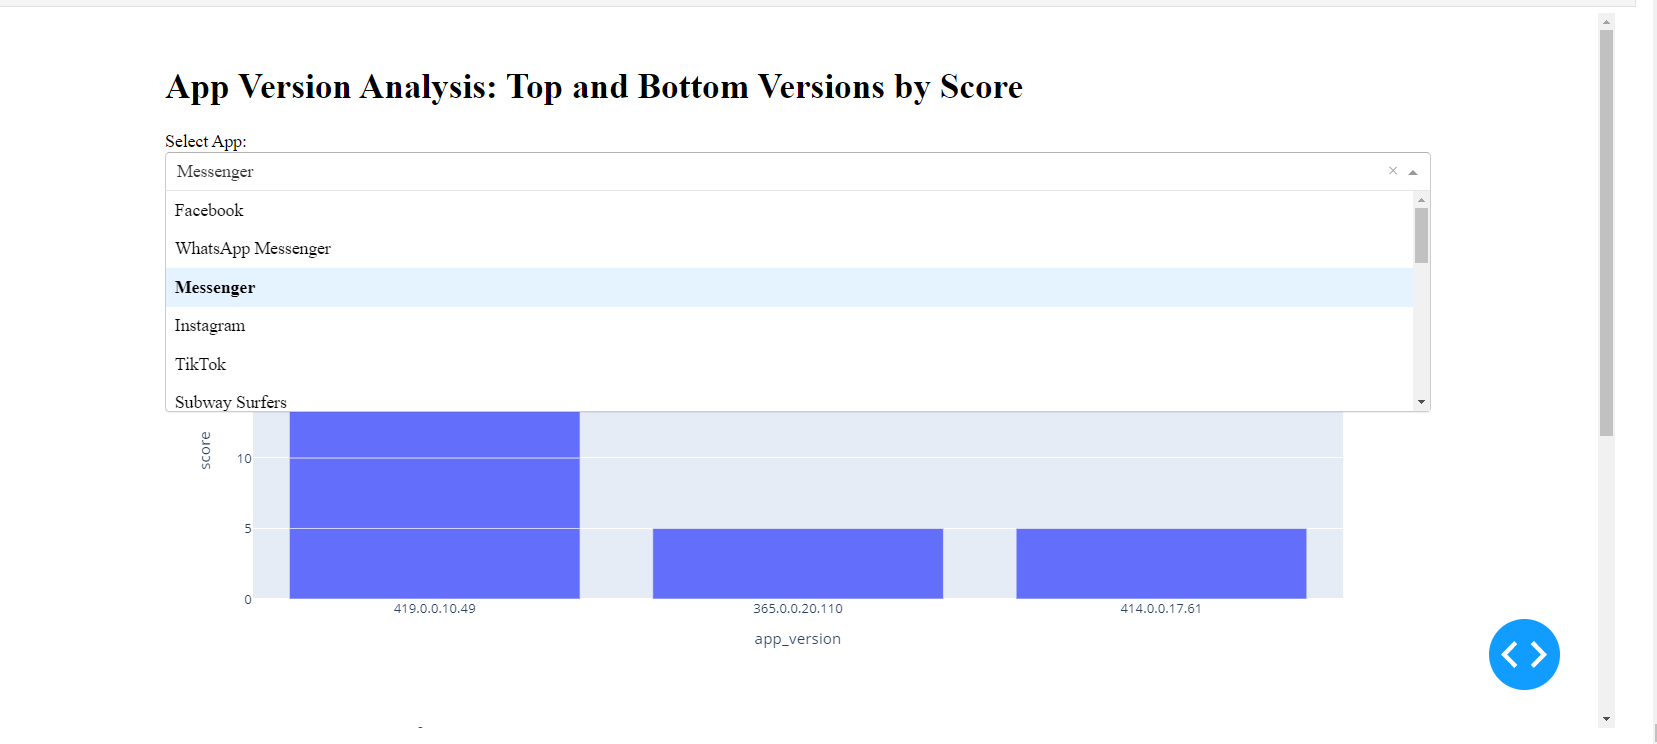

## 
<h2 id="import" style="color: #00c6ff ; background:#000000  ; padding: 20px; border-radius: 20px; text-align: center; border: 5px solid #990000;">
        3. Sentiment Analysis:
    </h2>
    

**Perform sentiment analysis on the reviews** to determine the overall sentiment (positive, negative, or neutral) of each review. This can help you understand how users feel about the apps and identify any patterns or trends in user sentiment.

***There are many ways to perform sentiment analysis on the reviews, some of them are here:***

**1. Pre-trained Model:**
Using a pre-trained sentiment analysis model can be a good option if you want a quick and easy solution without the need to train your own model. Pre-trained models are often trained on large datasets and can provide good accuracy for general sentiment analysis tasks. They are readily available in popular NLP libraries like Hugging Face's Transformers, spaCy, or TextBlob. However, the downside is that pre-trained models might not be specialized for your specific domain or data.

**2. Module/Library:**
Using a specialized module or library for sentiment analysis can be beneficial if you need a specific set of functionalities tailored for sentiment analysis tasks. Libraries like TextBlob, NLTK (Natural Language Toolkit), or VADER (Valence Aware Dictionary and sEntiment Reasoner) can provide out-of-the-box sentiment analysis capabilities. These libraries are easy to use and can be integrated into your project quickly. However, they may not be as customizable as training your own model.

**3. Custom Trained Model:**
Training your own sentiment analysis model can be the best choice if you have a large amount of domain-specific data and you want to fine-tune the model for your specific use case. Custom training allows you to achieve better performance and adapt the model to your specific data distribution, which can be crucial for certain applications. However, training a model from scratch requires more time, expertise, and computational resources.

In summary, if you have limited data and resources, using a pre-trained model or a library can be a practical and efficient choice. On the other hand, if you have domain-specific data and require high accuracy, a custom trained model might be the better option. Consider your project's requirements, available resources, and time constraints to make an informed decision.

### 
<h3 id="import" style="color: #a4edb8 ; background: #000000; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #990000;">
        1. Using a  Module/Library:
    </h3>

**Sentiment Analysis for App Reviews**

The goal of this code is to perform sentiment analysis on app reviews. The input data consists of app reviews with corresponding scores ranging from 1 to 5, where 1 and 2 indicate negative reviews, 3 indicates neutral reviews, and 4 and 5 indicate positive reviews.

The code aims to achieve the following:

1. Use a pre-trained sentiment analysis library to classify each review into one of the three categories: negative, neutral, or positive sentiment.

2. Create a new column in the dataset called "sentiment" to store the predicted sentiment for each review.

3. Calculate the accuracy score of the sentiment predictions, which measures how well the model correctly classified the reviews.

4. Generate a confusion matrix to understand which sentiment classes the model is making the most wrong predictions for. The confusion matrix provides a breakdown of true positive, false positive, true negative, and false negative counts for each sentiment category.

5. Generate a classification report that provides additional performance metrics such as precision, recall, and F1-score for each sentiment class. This report helps to gain more insights into the model's performance on each sentiment category.

The analysis will provide valuable information about how well the sentiment analysis model performs on app reviews, helping app developers and companies to better understand customer sentiments and feedback for their apps.

1. Install the required libraries:

In [ ]:
pip install pandas textblob

2. Import the necessary modules:

In [155]:
from textblob import TextBlob

3. containing the text of each review, apply the sentiment analysis to each review and create the new 'sentiment' column:

In [162]:
df_reviews['sentiment'] = df_reviews['review'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Create a function to map sentiment polarity to 'positive', 'negative', or 'neutral'
def map_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Map sentiment polarity to 'positive', 'negative', or 'neutral'
df_reviews['sentiment'] = df_reviews['sentiment'].map(map_sentiment)

4. Calculate the accuracy score of the sentiment predictions, which measures how well the model correctly classified the reviews.


In [167]:
def calculate_accuracy_score(df_reviews):
    # Create a mapping of score and sentiment categories
    score_sentiment_mapping = {
        1: 'negative',
        2: 'negative',
        3: 'neutral',
        4: 'positive',
        5: 'positive'
    }

    # Map the score to the corresponding sentiment category
    df_reviews['predicted_sentiment'] = df_reviews['score'].map(score_sentiment_mapping)

    # Calculate the number of correct predictions
    correct_predictions = df_reviews['sentiment'] == df_reviews['predicted_sentiment']

    # Calculate accuracy as a percentage
    accuracy = (correct_predictions.sum() / len(df_reviews)) * 100

    return accuracy

# Call the function and get the accuracy score
accuracy_score = calculate_accuracy_score(df_reviews)

print(f"Accuracy Score: {accuracy_score:.2f}")


Accuracy Score: 55.15


5.  Generate a confusion matrix to understand which sentiment classes the model is making the most wrong predictions for. The confusion matrix provides a breakdown of true positive, false positive, true negative, and false negative counts for each sentiment category.

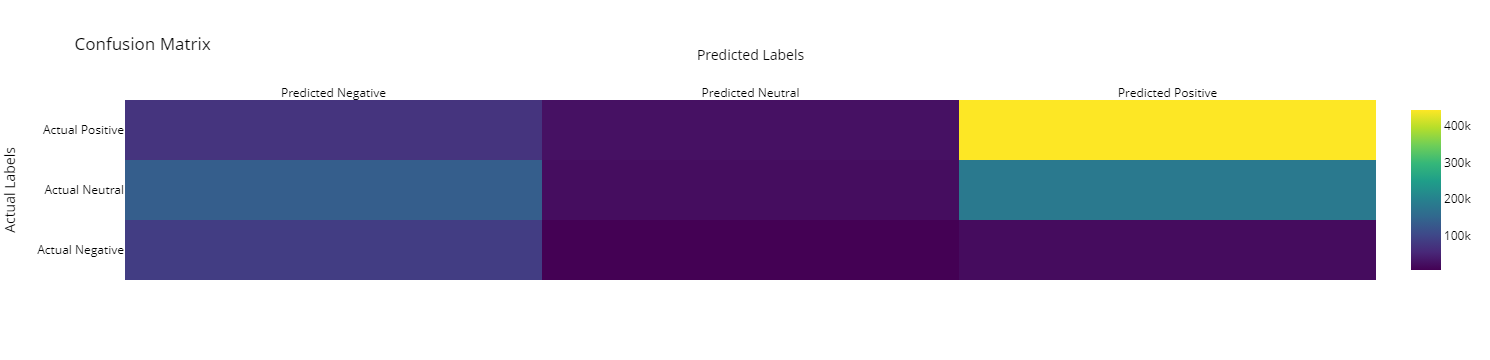

In [181]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Assume you have a DataFrame 'df_reviews' with columns 'sentiment' and 'predicted_sentiment'

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df_reviews['sentiment'], df_reviews['predicted_sentiment'])

# Create a heatmap for the confusion matrix
fig_confusion_matrix = go.Figure(data=go.Heatmap(z=conf_matrix,
                                                x=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
                                                y=['Actual Negative', 'Actual Neutral', 'Actual Positive'],
                                                hoverinfo='z',
                                                colorscale='Viridis'))

# Customize the layout of the heatmap
fig_confusion_matrix.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='Actual Labels',
    xaxis=dict(side='top'),
    plot_bgcolor='white',      # Set the background color of the plot area to white
    paper_bgcolor='white',     # Set the background color of the entire figure to white
    font=dict(color='black'),  # Set the font color to black
    height=600,
)

# Show the plot
fig_confusion_matrix.show()

6. Generate a classification report that provides additional performance metrics such as precision, recall, and F1-score for each sentiment class. This report helps to gain more insights into the model's performance on each sentiment category.

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate the classification report
class_report = classification_report(df_reviews['sentiment'], df_reviews['predicted_sentiment'])

# Create a Markdown formatted text to display the classification report
markdown_text = f"Classification Report\n\n \n{class_report}\n"

# Display the classification report
print(markdown_text)

Classification Report

 
              precision    recall  f1-score   support

    negative       0.29      0.75      0.42    114999
     neutral       0.39      0.06      0.11    341986
    positive       0.68      0.82      0.74    542945

    accuracy                           0.55    999930
   macro avg       0.45      0.54      0.42    999930
weighted avg       0.54      0.55      0.49    999930




The classification report provides a detailed analysis of the model's performance on sentiment analysis. Let's interpret the results:

**Classification Report Interpretation**

1. Precision: Precision measures the accuracy of the positive predictions. For the 'negative' class, the precision is 0.29, indicating that 29% of the predicted 'negative' sentiments were actually correct. For the 'neutral' class, the precision is 0.39, indicating that 39% of the predicted 'neutral' sentiments were actually correct. For the 'positive' class, the precision is 0.68, indicating that 68% of the predicted 'positive' sentiments were actually correct.

2. Recall: Recall measures the sensitivity of the model to detect positive instances. For the 'negative' class, the recall is 0.75, indicating that the model correctly identified 75% of the actual 'negative' sentiments. For the 'neutral' class, the recall is 0.06, indicating that the model could only identify 6% of the actual 'neutral' sentiments. For the 'positive' class, the recall is 0.82, indicating that the model correctly identified 82% of the actual 'positive' sentiments.

3. F1-score: The F1-score is the harmonic mean of precision and recall and is useful when you have an imbalanced dataset. For the 'negative' class, the F1-score is 0.42, for 'neutral' it is 0.11, and for 'positive' it is 0.74.

4. Support: The support column indicates the number of occurrences of each class in the dataset.

5. Accuracy: The accuracy of the model is 0.55, which means that 55% of the predictions were correct.

6. Macro Avg: The macro average takes the unweighted mean of precision, recall, and F1-score across all classes. The macro average precision, recall, and F1-score are 0.45, 0.54, and 0.42, respectively.

7. Weighted Avg: The weighted average takes the weighted mean of precision, recall, and F1-score based on the number of occurrences of each class. The weighted average precision, recall, and F1-score are 0.54, 0.55, and 0.49, respectively.

**Conclusion**

The classification report shows that the model's performance is better in predicting 'positive' sentiments but performs poorly in identifying 'neutral' sentiments. It has a higher accuracy for 'positive' sentiments, but its overall accuracy is moderate due to the imbalanced dataset. The F1-scores indicate that the model's performance is decent for 'positive' sentiments, but it needs improvement for 'negative' and 'neutral' sentiments. Further optimization and fine-tuning of the model may help improve its performance on all sentiment classes.

### 
<h3 id="import" style="color: #a4edb8 ; background: #000000; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #990000;">
       2. Using a pre-trained sentiment analysis model:
    </h3>

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
A. Sentiment Analysis using Pre-trained DistilBERT Model
</h4>

In this code, we perform sentiment analysis using a pre-trained DistilBERT model from the Hugging Face Transformers library. The goal is to analyze the sentiment of reviews and classify them into one of three categories: 'negative', 'neutral', or 'positive'.

Here are the main steps of the code:

1. **Load Pre-trained Model:** We load the 'distilbert-base-uncased' model and tokenizer, which is a smaller version of BERT and is trained on uncased text.

2. **Text Preprocessing:** We preprocess the review text by converting it to lowercase and removing extra white spaces.

3. **Custom Dataset Creation:** We create a custom dataset for sentiment analysis, which includes the preprocessed review texts and their corresponding sentiment labels (scores).

4. **Data Loading:** We use a DataLoader to load the dataset in batches, making it easier to work with large datasets.

5. **Model Configuration:** We move the model to the GPU if available and set it to evaluation mode.

6. **Sentiment Analysis:** We perform sentiment analysis on the dataset using the pre-trained model. For each review, the model predicts a sentiment label ('negative', 'neutral', or 'positive').

7. **Label Mapping:** We map the predicted sentiment labels back to their corresponding categories.

8. **Accuracy Calculation:** We calculate the accuracy score of the model's predictions by comparing them with the true sentiment labels.

9. **Classification Report:** We generate a classification report that includes precision, recall, and F1-score for each sentiment class. This report helps evaluate the model's performance in classifying reviews into different sentiment categories.

By using the pre-trained DistilBERT model, we can achieve accurate sentiment analysis and better understand the sentiment distribution of reviews in our dataset.

***1. make sure you have installed the required libraries using pip:***

In [ ]:
!pip install transformers
!pip install torch

***2. import the important libraries:***

In [12]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

***3. Load the pre-trained DistilBERT model and tokenizer:***

In [13]:
# Load the pre-trained DistilBERT model and tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


***4. Text preprocessing function:***

To improve the results of the sentiment analysis, you can apply various text preprocessing techniques in the `process_text` function. Here are some ideas:

1. **Lowercasing:** Convert all text to lowercase. This ensures that the model treats uppercase and lowercase words equally.

2. **Removing Punctuation:** Remove punctuation marks from the text. Punctuation usually doesn't contribute much to sentiment analysis and can be safely removed.

3. **Removing URLs and Special Characters:** If the text contains URLs, special characters, or emojis, consider removing them as they might not provide valuable sentiment information.

4. **Tokenization:** Break down the text into individual tokens (words). Tokenization helps the model understand the structure of the text.

5. **Stopword Removal:** Remove common stopwords (e.g., "the," "and," "is") as they do not carry much sentiment information.

6. **Stemming or Lemmatization:** Reducing words to their root form (stemming) or converting words to their base form (lemmatization) can help the model generalize better.

7. **Handling Emoticons and Slang:** If your dataset contains emoticons or slang, consider converting them to their corresponding sentiment representations.

8. **Handling Negations:** Negations can change the sentiment of a sentence. Consider adding a prefix to negated words to preserve their meaning during analysis.

9. **Handling Emoji and Emoticons:** Emojis and emoticons often carry sentiment. Consider mapping them to a sentiment scale.

10. **Handling Numbers and Quantities:** Decide whether to remove or handle numbers and quantities in the text.

11. **Removing HTML Tags:** If the text contains HTML tags (e.g., from web scraping), remove them.

12. **Handling Abbreviations and Acronyms:** Expand common abbreviations and acronyms to their full form.


In [194]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs and Special Characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Handling Abbreviations and Acronyms (Example: 'I'm' -> 'I am', 'can't' -> 'can not')
    abbreviations = {
    "i'm": "i am",
    "can't": "can not",
    "won't": "will not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "haven't": "have not",
    "hasn't": "has not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "it's": "it is",
    "that's": "that is",
    "we're": "we are",
    "you're": "you are",
    "they're": "they are",
    "i've": "i have",
    "we've": "we have",
    "you've": "you have",
    "they've": "they have",
    "i'll": "i will",
    "we'll": "we will",
    "you'll": "you will",
    "they'll": "they will",
    # Add more abbreviations and their expansions as needed in the future
}
    tokens = [abbreviations[token] if token in abbreviations else token for token in tokens]

    # Handling Emoticons and Slang (Example: ':)' -> 'happy', 'lol' -> 'laugh out loud')
    emoticons_slang = {
        ":)": "happy",
        "lol": "laugh out loud",
        # Add more emoticons and their sentiment representations as needed
    }
    tokens = [emoticons_slang[token] if token in emoticons_slang else token for token in tokens]

    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

def lowercase(text):
    return text.lower()

def remove_urls_special_chars(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def expand_abbreviations(tokens):
    abbreviations = {
        "i'm": "i am",
        "can't": "can not",
        "won't": "will not",
        "couldn't": "could not",
        "shouldn't": "should not",
        "wouldn't": "would not",
        "haven't": "have not",
        "hasn't": "has not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "it's": "it is",
        "that's": "that is",
        "we're": "we are",
        "you're": "you are",
        "they're": "they are",
        "i've": "i have",
        "we've": "we have",
        "you've": "you have",
        "they've": "they have",
        "i'll": "i will",
        "we'll": "we will",
        "you'll": "you will",
        "they'll": "they will",
        # Add more abbreviations and their expansions as needed in the future
    }
    return [abbreviations[token] if token in abbreviations else token for token in tokens]

def expand_emoticons_slang(tokens):
    emoticons_slang = {
    ":)": "happy",
    "lol": "laugh out loud",
    ":D": "happy",
    ":(": "sad",
    ";)": "wink",
    ":P": "playful",
    ":-(": "sad",
    ":-)": "happy",
    "<3": "love",
    ":/": "confused",
    ":|": "neutral",
    ":O": "surprised",
    ":*": "kiss",
    ":$": "blush",
    ":3": "cute",
    ":\\": "confused",
    ":'(": "crying",
    ":v": "peace",
    ":^)": "smile",
    "8-)": "cool",
    ">:(": "angry",
    ":3": "cute",
    ":]": "happy",
    ":}": "happy",
    ":>": "smile",
    ";-)": "wink",
    "B-)": "cool",
    ">:D": "evil",
    "O:)": "angel",
    "O.O": "surprised",
    ":X": "shut up",
    ":T": "confused",
    "O.o": "confused",
    "-_-": "annoyed",
    ":o)": "clown",
    ":|]": "robot",
    ":poop:": "poop",
    # Add more emoticons and their sentiment representations as needed in the future
}
    return [emoticons_slang[token] if token in emoticons_slang else token for token in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = remove_urls_special_chars(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem(tokens)
    tokens = expand_abbreviations(tokens)
    tokens = expand_emoticons_slang(tokens)
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***5. Preprocess the text in the `review_text` column:***

In [196]:
df_reviews['processed_text'] = df_reviews['review'].apply(preprocess_text)

In [8]:
#  df_reviews.to_csv('processed_text_google_play_reviews.csv', index = False)
# df_reviews = pd.read_csv('processed_text_google_play_reviews.csv')

***6. Define a custom dataset for sentiment analysis***

In [14]:
# Define a custom dataset for sentiment analysis
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

***7. Create a DataLoader for the dataset***

In [15]:
# Create a DataLoader for the dataset
max_length = 128
dataset = SentimentDataset(df_reviews['processed_text'].values, df_reviews['score'].values - 1, tokenizer, max_length)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

***8. Move model to GPU if available***

In [16]:
# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

***9. Set model to evaluation mode***

In [17]:
# Set model to evaluation mode
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

***10. Perform sentiment analysis on the dataset***

In [ ]:
# Perform sentiment analysis on the dataset
predicted_sentiments = []
true_sentiments = []

with torch.no_grad():
    for batch in tqdm(data_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        predicted_labels = logits.argmax(dim=1)
        predicted_sentiments.extend(predicted_labels.cpu().numpy())
        true_sentiments.extend(labels.cpu().numpy())


***11. Map the predicted sentiment labels back to 'negative', 'neutral', and 'positive'***

In [ ]:
# Map the predicted sentiment labels back to 'negative', 'neutral', and 'positive'
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
df_reviews['predicted_sentiment_with_torch'] = [label_map[label] for label in predicted_sentiments]

***12. Calculate accuracy score***

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(df_reviews['sentiment'], df_reviews['predicted_sentiment'])

***13. Generate classification report***

In [ ]:
# Generate classification report
classification_rep = classification_report(df_reviews['sentiment'], df_reviews['predicted_sentiment'])

In [ ]:
print(f"Accuracy Score: {accuracy*100:.2f}")
print("Classification Report:")
print(classification_rep)

Since performing sentiment analysis on the entire dataset would be time-consuming and may take at least 30 hours on your current machine, we can use a more efficient approach by processing the data in smaller batches. To achieve this, we can create an on-demand processing function that takes a subset of the dataset as input and performs sentiment analysis on that subset. This way, we can process the data in manageable chunks and avoid overwhelming system resources.

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
B. Sentiment Analysis using bert-base-multilingual-uncased-sentimen model:
</h4>

***1. Install and Import Dependencies:***

To begin, access this website https://pytorch.org/ and carefully select the appropriate dependencies that match your machine's specifications.

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!pip install transformers 

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

***2. Instantiate Model:***

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

***3. Generate a subset dataframe to perform sentiment analysis on:***

In [ ]:
import pandas as pd


# Get the total number of rows in df_reviews
total_rows = len(df_reviews)

# Set the desired sample size
sample_size = 2000

# Calculate the fraction needed to get the desired sample size
frac = sample_size / total_rows

# Create the sampled dataset
sampled_df = df_reviews.sample(frac=frac, random_state=42)

# Reset the index of the sampled dataset
sampled_df.reset_index(drop=True, inplace=True)

# Now 'sampled_df' contains the sampled data with 2000 rows that represent the data distribution.

In [9]:
# Delete:
sampled_df = pd.read_csv(r'sampled_sentiment_data.csv')

***4. Create a function for Encoding and Sentiment Calculation:***

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

***5. Apply the function and convert the 'sentiment_2' column to a string type:***

In [ ]:
# Convert the 'review' column to string type
sampled_df['processed_text'] = sampled_df['processed_text'].astype(str)

# Apply the function
sampled_df['sentiment_2'] = sampled_df['processed_text'].apply(lambda x: sentiment_score(x[:512]))

***6. Map the values in the 'sentiment_2' column using the custom mapping:***

In [ ]:
# Create a custom mapping dictionary
sentiment_mapping = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}

# Map the values in the 'sentiment_2' column using the custom mapping
sampled_df['sentiment_2'] = sampled_df['sentiment_2'].map(sentiment_mapping)

In [ ]:
# If you want to have a quick overview of the results.
sampled_df.head()

***7. Segmented Sentiment Analysis: Handling Long Texts with Average Scores***

Since the model we are using can only process text up to 512 tokens at a time, I have developed a function that divides each review into segments of 512 tokens. It then feeds these segments to the model individually and obtains sentiment scores for each segment. To obtain the final sentiment score for the entire review, the function calculates the average of all the segment scores. This approach allows us to handle reviews of any length and get an overall sentiment score that represents the entire review.

In [ ]:
def sentiment_score_segmented(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    num_segments = (len(tokens[0]) - 1) // 512 + 1
    scores = []

    for i in range(num_segments):
        start = i * 512
        end = (i + 1) * 512
        segment_tokens = tokens[:, start:end]
        result = model(segment_tokens)
        scores.append(torch.argmax(result.logits).item() + 1)

    average_score = sum(scores) / len(scores)
    return average_score

The goal of this code is to perform sentiment analysis on long text reviews using a transformer-based language model that can process a maximum of 512 tokens at a time. To handle texts longer than this limit, the code segments the input text into multiple chunks of 512 tokens, analyzes the sentiment for each segment, and then calculates the average sentiment score across all segments. This approach ensures that the sentiment analysis covers the entire text and provides an overall sentiment score for each review.

In [ ]:
# Apply the function
sampled_df['sentiment_2_num'] = sampled_df['processed_text'].apply(sentiment_score_segmented)

### 
<h3 id="import" style="color: #a4edb8 ; background: #000000; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #990000;">
        3. Sentiment Analysis Dashboard: Unleashing the Power of Sentiment Analysis Models:
    </h3>

Welcome to our Sentiment Analysis Dashboard! This interactive tool allows you to select a company of your choice and specify a sentiment score to explore the reviews related to that company. Simply choose the company and sentiment score from the provided dropdown menus, and the dashboard will display a selection of reviews, along with their processed text and corresponding sentiment scores. You can now delve into the sentiments expressed in these reviews and gain valuable insights into the customers' perceptions. Discover the power of sentiment analysis and explore how companies are perceived by their customers through their written words.

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
1. Rename the columns:
</h4>

We have decided to rename the columns in our dataset to ensure a more intuitive and meaningful representation:

1. `sentiment` (old name) will be renamed to `textblob_sentiment_score` (new name): This column contains sentiment scores computed using TextBlob.

2. `processed_text` (old name) will be renamed to `mapped_sentiment_score` (new name): This column contains the processed text data after various text preprocessing steps.

3. `sentiment_2` (old name) will be renamed to `bert_sentiment_score` (new name): This column contains sentiment scores generated by the BERT model `bert-base-multilingual-uncased-sentiment`.

4. `sentiment_2_num` (old name) will be renamed to `segmented_bert_sentiment_score` (new name): This column contains sentiment scores computed by segmenting the text and taking the average sentiment score using BERT.

In [74]:
# Rename the columns in df_reviews:
df_reviews.rename(columns={
    'sentiment': 'textblob_sentiment_score',
    'predicted_sentiment': 'mapped_sentiment_score'
}, inplace=True)

# Print the updated DataFrame
df_reviews.head()

review_id       user_name  \
0  b43f618a-3050-4f1d-afa9-0f81040e1c8f        alavi pm   
1  9fe6f3ce-05b4-45ba-bfe6-8c55a8a37e3d  manjesh Bandhe   
2  a1ee84ef-9214-4f84-9133-c4721465569c      Eric Baker   
3  c328d811-d38b-4302-9f45-1da727db2d81      Mia Doctor   
4  9b0be2e2-0947-40a4-88d2-0d89d20e5151        ANJI Asa   

                                          user_image  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a/AAcHTt...   
2  https://play-lh.googleusercontent.com/a/AAcHTt...   
3  https://play-lh.googleusercontent.com/a-/AD_cM...   
4  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                              review  score  thumbs_up_count  \
0                                                 .n      4                0   
1  ✨👇👇👇👇👇👇👇👇👇👇 👇 ✨ 🙏message karne se pahle follow...      5                0   
2                                     Nice options.😬      5                0   
3                                       Installation      4                0   
4                                                ,sb      1                0   

                  date reply_content replied_date     app_version  app_name  \
0  2023-08-02 01:04:53           NaN          NaN  325.0.0.36.170  Facebook   
1  2023-08-02 01:00:20           NaN          NaN             NaN  Facebook   
2  2023-08-02 00:59:45           NaN          NaN   423.0.0.21.64  Facebook   
3  2023-08-02 00:57:40           NaN          NaN   425.0.0.22.49  Facebook   
4  2023-08-02 00:57:03           NaN          NaN   424.0.0.21.75  Facebook   

  textblob_sentiment_score mapped_sentiment_score  \
0                  neutral               positive   
1                 negative               positive   
2                 positive               positive   
3                  neutral               positive   
4                  neutral               negative   

                                      processed_text  
0                                                  n  
1  messag karn se pahl follow kro singl boy बहत द...  
2                                        nice option  
3                                             instal  
4                                                 sb

In [77]:
# Rename the columns in sampled_df:
sampled_df.rename(columns={
    'sentiment': 'textblob_sentiment_score',
    'predicted_sentiment': 'mapped_sentiment_score',
    'sentiment_2':'bert_sentiment_score',
    'sentiment_2_num':'segmented_bert_sentiment_score'
}, inplace=True)

# Print the updated DataFrame
sampled_df.head()

review_id      user_name  \
0  7b60ef05-0b34-4c5c-8116-dae15837cd50   Azeem Azhari   
1  a014a433-9e15-4f51-b4b1-d49e035ca53d    MD DAYAL Sk   
2  46ccf07f-cda3-4c0d-99fd-ef4aa37481dd  Jerome Agliam   
3  bff13ebf-a4ef-4e59-baaf-2d255187c72f       - AGATHA   
4  515033a6-1f90-47c5-a908-420264964363      Hadi Khan   

                                          user_image  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a/AAcHTt...   
2  https://play-lh.googleusercontent.com/a-/AD_cM...   
3  https://play-lh.googleusercontent.com/a-/AD_cM...   
4  https://play-lh.googleusercontent.com/a-/AD_cM...   

                                              review  score  thumbs_up_count  \
0                          I have not received my AI      5                0   
1                                        Nd DAYAL Sk      5                0   
2  Calls don't drop and audio is very clear. Good...      5                0   
3                                         مزور تاريخ      1                0   
4                              Please unblock my num      1                0   

                  date reply_content replied_date app_version  \
0  2023-07-19 17:57:37           NaN          NaN         NaN   
1  2021-08-07 12:41:44           NaN          NaN         NaN   
2  2021-05-25 22:02:11           NaN          NaN   8.68.0.97   
3  2023-04-15 14:02:48           NaN          NaN         NaN   
4  2023-07-27 15:12:59           NaN          NaN  2.23.14.79   

             app_name textblob_sentiment_score mapped_sentiment_score  \
0            Snapchat                  neutral               positive   
1               Skype                  neutral               positive   
2               Skype                 positive               positive   
3             Netflix                  neutral               negative   
4  WhatsApp Messenger                  neutral               negative   

                              processed_text bert_sentiment_score  \
0                                  receiv ai             positive   
1                                nd dayal sk              neutral   
2  call dont drop audio clear good job skype             positive   
3                                 مزور تاريخ             positive   
4                          pleas unblock num             negative   

   segmented_bert_sentiment_score  topic  
0                             4.0      1  
1                             3.0      4  
2                             4.0      4  
3                             5.0      1  
4                             1.0      0

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
2.Interactive Sentiment Analysis Dashboard
</h4>

 In this interactive dashboard, users can select the name of the app and filter reviews based on their sentiment score. The dashboard will display the reviews along with their corresponding processed text and sentiment analysis. Users can easily explore and analyze the sentiment of reviews for different apps and filter them based on their scores. The dashboard provides an intuitive and creative way to interact with the sentiment analysis results.

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Sampled dataframe 'sampled_df' containing the required columns
# Replace this with your actual dataframe
# sampled_df = pd.read_csv('path_to_sampled_df.csv')  # Load your data here

# sampled df = pd.read_csv(r'https://raw.githubusercontent.com/ZaidAlmelhem/Dashboards/main/Distribution%20of%20Review%20Scores%20for%20Mobile%20Apps/sampled_df_8_7.csv')

# Create a Dash app
app = dash.Dash(__name__)
# server = server.app

# Layout of the app
app.layout = html.Div([
    html.H1("Sentiment Analysis Dashboard"),
    
    # Dropdown to select the name of the app
    html.Label("Select the Name of the App:"),
    dcc.Dropdown(
        id='app-name-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in sampled_df['app_name'].unique()],
        value=sampled_df['app_name'].unique()[0],
    ),
    
    # Slider to filter the score
    html.Label("Select Score Filter:"),
    dcc.Slider(
        id='score-filter-slider',
        min=1,
        max=5,
        value=3,
        marks={i: str(i) for i in range(1, 6)},
        step=1
    ),
    
    # Placeholder for displaying the reviews and sentiment analysis
    html.Div(id='review-sentiment-container'),
])

# Callback to update the review and sentiment analysis display
@app.callback(
    Output('review-sentiment-container', 'children'),
    Input('app-name-dropdown', 'value'),
    Input('score-filter-slider', 'value')
)
def update_review_sentiment(app_name, score_filter):
    filtered_reviews = sampled_df[(sampled_df['app_name'] == app_name) & (sampled_df['score'] == score_filter)]
    
    review_sentiment_html = []
    for _, row in filtered_reviews.iterrows():
        review_sentiment_html.append(html.Div([
            html.H3(f"Review {row.name}"),
            html.P(f"Review Text: {row['review']}"),
            html.P(f"Processed Text: {row['processed_text']}"),
            html.P(f"Score: {row['score']}"),
            html.P(f"TextBlob Sentiment Score: {row['textblob_sentiment_score']}"),
            html.P(f"Bert Sentiment Score: {row['bert_sentiment_score']}"),
            html.P(f"Segmented Bert Sentiment Score: {row['segmented_bert_sentiment_score']}"),
            html.Hr(),
        ]))
    
    return review_sentiment_html

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Note:** I've launched the dashboard on a cloud server, enabling you to engage with it directly through the web.

In [83]:
from IPython.display import IFrame

# Specify the URL of the website
website_url = "https://app-reviews-dash-2.onrender.com"

# Set the width and height of the iframe
iframe_width = "1400px"
iframe_height = "700px"

# Create and display the iframe
IFrame(website_url, width=iframe_width, height=iframe_height)

#### 
<h4 id="import" style="color: #5d0a70; background: #f7dcda; padding: 20px; border-radius: 20px; text-align: left; border: 5px solid #1c1c1c;">
3. Sentiment Analysis Dashboard using Dash
</h4>

This Python code showcases the creation of an interactive Sentiment Analysis Dashboard using the Dash framework. The dashboard allows users to select an app name and filter reviews based on their scores. The user interface is designed with a Black-Gold color scheme, featuring elegant fonts and smooth interactivity. The dashboard visualizes reviews with their corresponding sentiment analysis scores, providing a user-friendly and visually appealing experience for analyzing sentiment patterns of app reviews.

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

# Sampled dataframe 'sampled_df' containing the required columns
# Replace this with your actual dataframe
# sampled_df = pd.read_csv('path_to_sampled_df.csv')  # Load your data here

#sampled_df = pd.read_csv(r'https://raw.githubusercontent.com/ZaidAlmelhem/Dashboards/main/Distribution%20of%20Review%20Scores%20for%20Mobile%20Apps/sampled_df_8_7.csv')

# Create a Dash app
app = dash.Dash(__name__)
#server = server.app
# CSS styles
background_colors = {
    'main': '#152737',
    'secondary1': '#1d314a',
    'secondary2': '#0e1826',
}

text_colors = {
    'main': '#a4edb8',
    'secondary1': '#00c6ff',
    'secondary2': '#c7f1d8',
}

styles = {
    'textAlign': 'center',
    'backgroundColor': '#000000',
    'color': '#00c6ff',
    'fontFamily': 'Arial',
    'fontSize': '18px',
    'padding': '20px',
    'margin': '20px',
    'borderRadius': '10px',
    #'boxShadow': '0px 4px 8px rgba(255, 215, 0, 0.5)',
}

# Larger font size for labels
label_style = {'fontSize': '24px', 'fontWeight': 'bold', 'color': text_colors['secondary1']}

# Layout of the app
app.layout = html.Div(style={'maxWidth': '800px', 'margin': 'auto', 'padding': '40px'}, children=[
    html.H1("Sentiment Analysis Dashboard", style={'textAlign': 'center', 'color': text_colors['secondary1'], 'marginBottom': '40px'}),
    
    # Dropdown to select the name of the app
    html.Label("Select the Name of the App:", style={'fontSize': '18px',}),
    dcc.Dropdown(
        id='app-name-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in sampled_df['app_name'].unique()],
        value=sampled_df['app_name'].unique()[0]
        
    ),
    
    # Slider to filter the score
    html.Label("Select Score Filter:", style={'fontSize': '18px',}),
    dcc.Slider(
        id='score-filter-slider',
        min=1,
        max=5,
        value=3,
        marks={i: str(i) for i in range(1, 6)},
        step=1,
        className='slider-style',
        updatemode='drag',
    ),
    
    # Placeholder for displaying the reviews and sentiment analysis
    html.Div(id='review-sentiment-container', style={'textAlign': 'left'}),
])

# Create a function to generate a card for each review
def create_review_card(index, row):
    return html.Details([
        html.Summary(f"Review {index}", style={'color': text_colors['secondary1'], 'cursor': 'pointer'}),
        html.Div([
            html.P(f"Review Text: {row['review']}", style={'color': text_colors['main']}),
            html.P(f"Processed Text: {row['processed_text']}", style={'color': text_colors['main']}),
            html.P(f"Score: {row['score']}", style={'color': text_colors['secondary1']}),
            html.P(f"TextBlob Sentiment Score: {row['textblob_sentiment_score']}", style={'color': text_colors['secondary1']}),
            html.P(f"Bert Sentiment Score: {row['bert_sentiment_score']}", style={'color': text_colors['secondary1']}),
            html.P(f"Segmented Bert Sentiment Score: {row['segmented_bert_sentiment_score']}", style={'color': text_colors['secondary1']}),
            html.Hr(),
        ]),
    ], style={**styles, 'border': f'2px solid {text_colors["secondary2"]}', 'margin': '10px'}, id=f"card-{index}")

# Callback to update the review and sentiment analysis display
@app.callback(
    Output('review-sentiment-container', 'children'),
    Input('app-name-dropdown', 'value'),
    Input('score-filter-slider', 'value')
)
def update_review_sentiment(app_name, score_filter):
    filtered_reviews = sampled_df[(sampled_df['app_name'] == app_name) & (sampled_df['score'] == score_filter)]
    
    review_sentiment_html = []
    for index, row in filtered_reviews.iterrows():
        review_sentiment_html.append(create_review_card(index, row))
    
    return review_sentiment_html

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


**Note:** I've launched the dashboard on a cloud server, enabling you to engage with it directly through the web.

In [88]:
from IPython.display import IFrame

# Specify the URL of the website
website_url = "https://app-reviews-dash-3.onrender.com"

# Set the width and height of the iframe
iframe_width = "1400px"
iframe_height = "700px"

# Create and display the iframe
IFrame(website_url, width=iframe_width, height=iframe_height)

##
<h2 id="import" style="color: #00c6ff ; background:#000000  ; padding: 20px; border-radius: 20px; text-align: center; border: 5px solid #990000;">
        4. Topic Modeling:
    </h2>
    